In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import pickle
import random
import time
from random import randint
import datetime
import random
import tqdm
from tqdm.notebook import tqdm_notebook
import math
import re
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge, Lasso
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Example

In [2]:
time_now = str(datetime.datetime.now().date())
time_start = "2010-06-30"
time_end = time_now#'2022-07-02'
#trading_data = yf.download("AAPL MSFT AMZN GOOGL GOOG TSLA BRK-B JNJ UNH NVDA", start="2010-06-30", end='2022-06-01')
stocks = ['AAPL', 
          'MSFT', 
          'AMZN', 
          'GOOGL', 
          'GOOG', 
          'TSLA', 
          'BRK-B', 
          'JNJ', 
          'UNH', 
          'NVDA',
          'AAL',
          'SONY',
          'META',
          'JPM',
          'V',
         ]
AAPL_trading_data = yf.download("AAPL", start=time_start, end=time_end)
MSFT_trading_data = yf.download("MSFT", start=time_start, end=time_end)
AMZN_trading_data = yf.download("AMZN", start=time_start, end=time_end)
GOOGL_trading_data = yf.download("GOOGL", start=time_start, end=time_end)
GOOG_trading_data = yf.download("GOOG", start=time_start, end=time_end)
TSLA_trading_data = yf.download("TSLA", start=time_start, end=time_end)
BRKB_trading_data = yf.download("BRK-B", start=time_start, end=time_end)
JNJ_trading_data = yf.download("JNJ", start=time_start, end=time_end)
UNH_trading_data = yf.download("UNH", start=time_start, end=time_end)
NVDA_trading_data = yf.download("NVDA", start=time_start, end=time_end)
AAL_trading_data = yf.download("AAL", start=time_start, end=time_end)
SONY_trading_data = yf.download("SONY", start=time_start, end=time_end)
META_trading_data = yf.download("META", start=time_start, end=time_end)
JPM_trading_data = yf.download("JPM", start=time_start, end=time_end)
V_trading_data = yf.download("V", start=time_start, end=time_end)

trading_datas = [AAPL_trading_data, 
                 MSFT_trading_data, 
                 AMZN_trading_data, 
                 GOOGL_trading_data, 
                 GOOG_trading_data, 
                 TSLA_trading_data, 
                 BRKB_trading_data, 
                 JNJ_trading_data, 
                 UNH_trading_data, 
                 NVDA_trading_data,
                 AAL_trading_data,
                 SONY_trading_data,
                 META_trading_data,
                 JPM_trading_data,
                 V_trading_data
                ]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
class Technical_Indicators(object):
    def __init__(self, stock_data, STD_periods, SMA_periods, SMA_envelope_range_percentage, EMA_period, MACD_shortPeriod, MACD_longPeriod, MACD_signalPeriod, RSI_period, Stoch_periods, KDJ_periods):
        self.stock_data = stock_data
        self.STD_periods = STD_periods
        self.SMA_periods = SMA_periods
        self.SMA_envelope_range_percentage = SMA_envelope_range_percentage
        self.EMA_period = EMA_period
        self.MACD_shortPeriod = MACD_shortPeriod
        self.MACD_longPeriod = MACD_longPeriod
        self.MACD_signalPeriod = MACD_signalPeriod
        self.RSI_period = RSI_period
        self.Stoch_periods = Stoch_periods
        self.KDJ_periods = KDJ_periods
    
    def calculate_OC(self, stock_data):
        open_close = stock_data['Open'] - stock_data['Close']
        return open_close
    
    def calculate_HL(self, stock_data):
        hogh_low = stock_data['High'] - stock_data['Low']
        return hogh_low

    def calculate_percent_change(self, stock_data):
        percent_change = stock_data['Close'].pct_change()
        return percent_change
    
    def calculate_std(self, close, days):
        standard_deviations = round(close.rolling(window = int(days)).std(), 4)
        return standard_deviations
    
    def calculate_SMA(self, close, days):
        simple_moving_averages = round(close.rolling(window = int(days)).mean(), 4)
        return simple_moving_averages
    
    def calculate_SMA_envelope(self, close, period, range_percentage):
        sma = self.calculate_SMA(close, period)
        up = sma*(1 + range_percentage * 0.01)
        down = sma*(1 - range_percentage * 0.01)
        return up, down
    
    def calculate_EMA(self, close, days):
        exponential_moving_averages = round(close.ewm(span = int(days), adjust = False, min_periods=days).mean(), 4)
        return exponential_moving_averages
    
    def calculate_MACD(self, close, MACD_shortPeriod, MACD_longPeriod, MACD_signalPeriod):
        ema_short = self.calculate_EMA(close, self.MACD_shortPeriod)
        ema_long = self.calculate_EMA(close, self.MACD_longPeriod)
        macd = pd.Series(ema_short)-pd.Series(ema_long)
        signal = round(macd.ewm(span=self.MACD_signalPeriod, adjust=False, min_periods=self.MACD_signalPeriod).mean(), 4)
        macd_hist = round(macd - signal, 4)
        return macd, signal, macd_hist
    
    def calculate_RSI(self, close, period):
        diff = close.diff()
        diff = diff[1:]
        gain, loss = diff.clip(lower=0), abs(diff.clip(upper=0))
        gain_avg , loss_avg = round(gain.ewm(com = period - 1, adjust=True, min_periods = period).mean(), 4), round(loss.ewm(com = period - 1, adjust=True, min_periods = period).mean(), 4)
        rs = gain_avg/loss_avg
        rsi =100 - (100/(1 + rs))
        return rsi
    
    def calculate_StochRSI(self, close, periods):
        rsi_period = periods[0]
        stc_period = periods[1]
        stk_period = periods[2]
        std_period = periods[3]
        rsi = self.calculate_RSI(close, rsi_period)
        rsi = rsi.dropna(axis=0)
        min_rsi = rsi.rolling(window = int(stc_period)).min()
        max_rsi = rsi.rolling(window = int(stc_period)).max()
        stochrsi = 100 * ((rsi - min_rsi)/(max_rsi - min_rsi))
        stk = stochrsi.rolling(window = int(stk_period)).max()
        std = stk.rolling(window = int(std_period)).min()
        return stk, std
    
    def calculate_kdj(self, stock_data, periods):
        lows = stock_data['Low'].rolling(periods[0]).min()
        lows.fillna(value = stock_data['Low'].expanding().min(), inplace = True)
        highs = stock_data['High'].rolling(periods[1]).max()
        highs.fillna(value = stock_data['High'].expanding().max(), inplace = True)
        rsv = (stock_data['Close'] - lows) / (highs - lows) * 100
        kdj_data = pd.DataFrame(columns=['K','D','J'])
        kdj_data['K'] = rsv.ewm(com=2).mean()
        kdj_data['D'] = kdj_data['K'].ewm(com=2).mean().tolist()
        kdj_data['J'] = 3 * kdj_data['K'] - 2 * kdj_data['D']
        return kdj_data

    def main(self):
        df_results = stock_data
        df_results['OC'] = self.calculate_OC(stock_data)
        df_results['HL'] = self.calculate_HL(stock_data)
        #df_results['Pct_Change'] = self.calculate_percent_change(stock_data)
        
        for period in self.STD_periods:
            STD_name = 'STD'+str(period)
            df_results[STD_name] = self.calculate_std(stock_data['Close'], period)
            
        for period in self.SMA_periods:
            SMA_name = 'SMA'+str(period)
            df_results[SMA_name] = self.calculate_SMA(stock_data['Close'], period)
            
            SMA_envelope_name = 'SMA_'+str(period)+'_'+str(self.SMA_envelope_range_percentage)
            #print (SMA_envelope_name)
            df_results[SMA_envelope_name+'up']= self.calculate_SMA_envelope(stock_data['Close'], period, self.SMA_envelope_range_percentage)[0]
            df_results[SMA_envelope_name+'down']= self.calculate_SMA_envelope(stock_data['Close'], period, self.SMA_envelope_range_percentage)[1]
        
        df_results['EMA'] = self.calculate_EMA(stock_data['Close'], self.EMA_period)
        
        MACD = self.calculate_MACD(stock_data['Close'], self.MACD_shortPeriod, self.MACD_longPeriod, self.MACD_signalPeriod)
        df_results['MACD'] = MACD[0]
        df_results['MACD_Signal'] = MACD[1]
        df_results['MACD_Hist'] = MACD[2]
        
        df_results['RSI'] = self.calculate_RSI(stock_data['Close'], self.RSI_period)
        stoch_rsi = self.calculate_StochRSI(stock_data['Close'], self.Stoch_periods)
        df_results['Stoch_RSI_K'] = stoch_rsi[0]
        df_results['Stoch_RSI_D'] = stoch_rsi[1]
        
        kdj = self.calculate_kdj(stock_data, self.KDJ_periods)
        df_results['K'] = kdj['K']
        df_results['D'] = kdj['D']
        df_results['J'] = kdj['J']
        
        return df_results

<ipython-input-4-57cf259bc52f>:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,12))


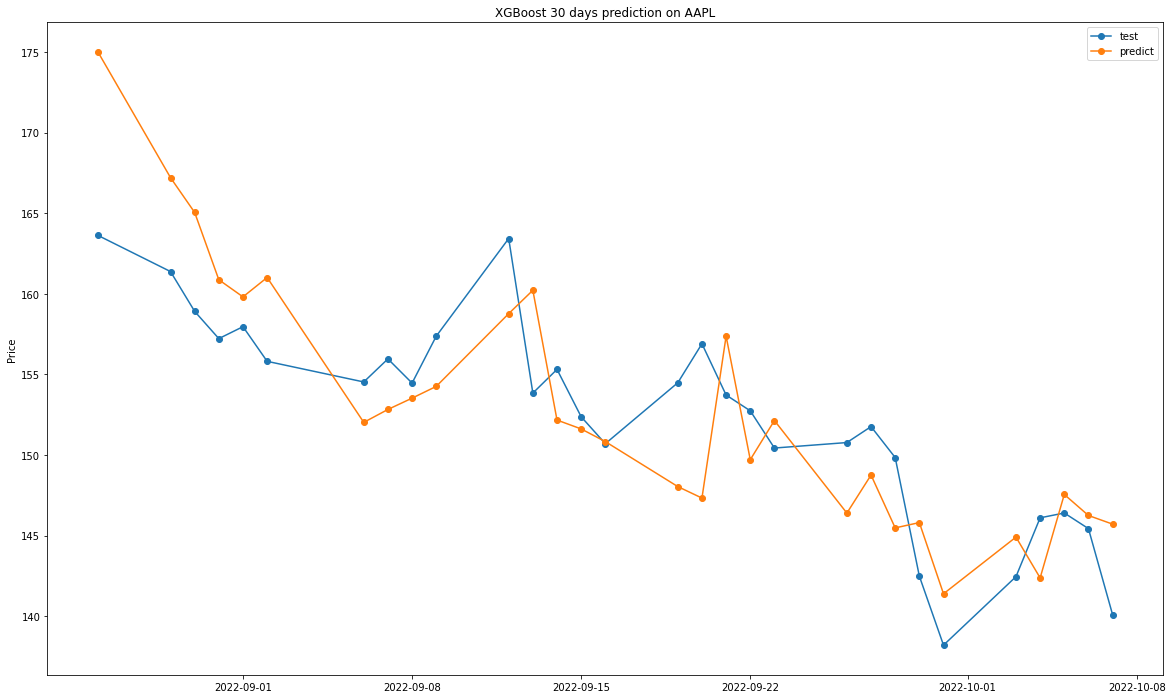

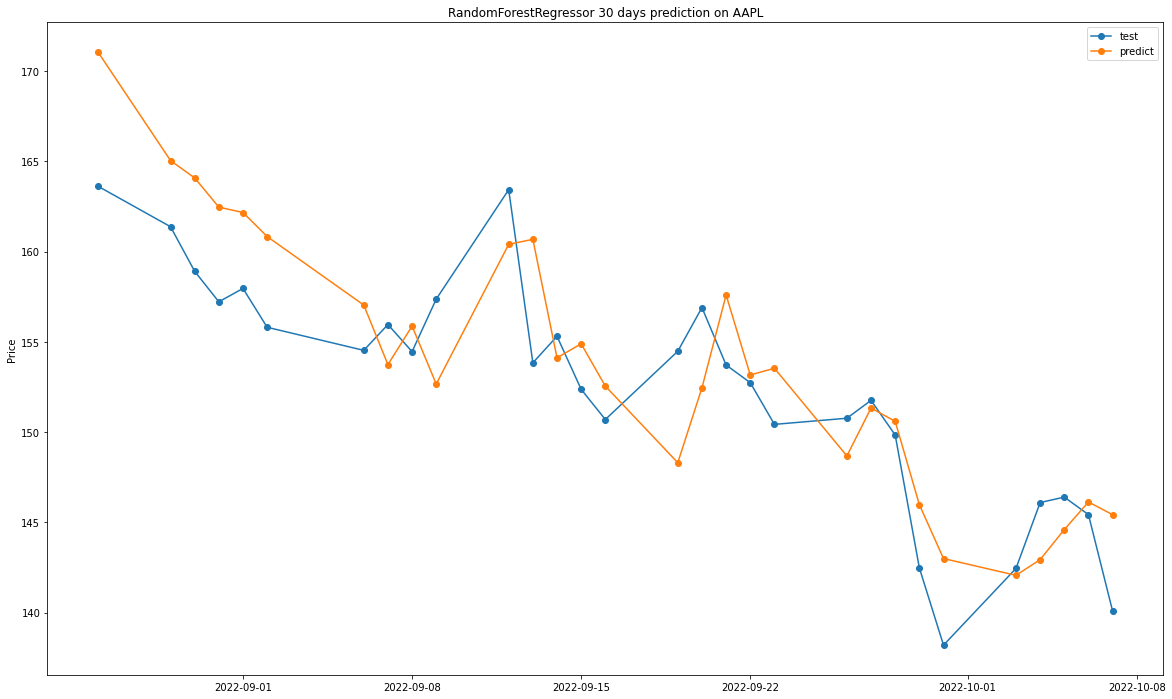

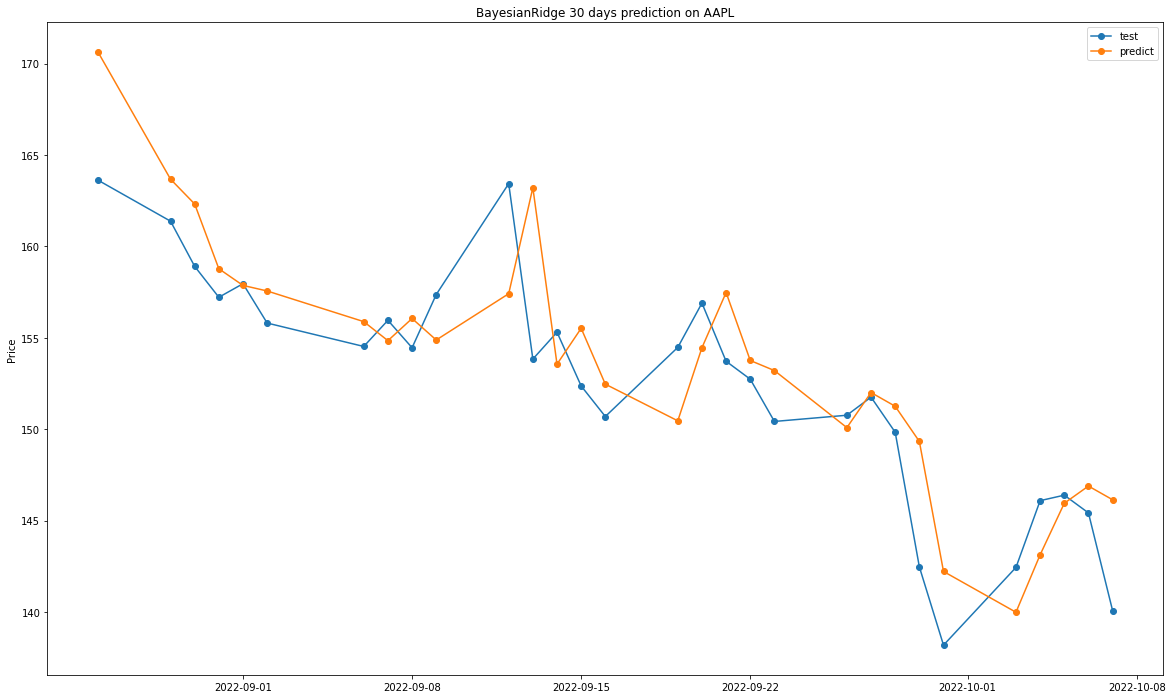

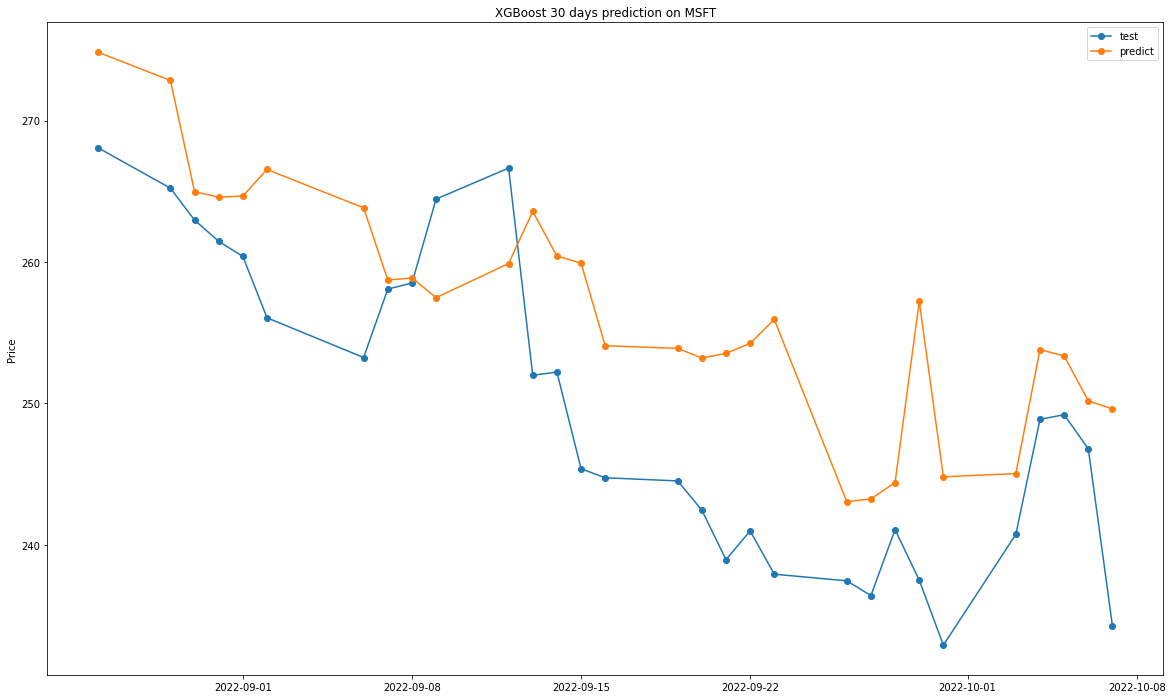

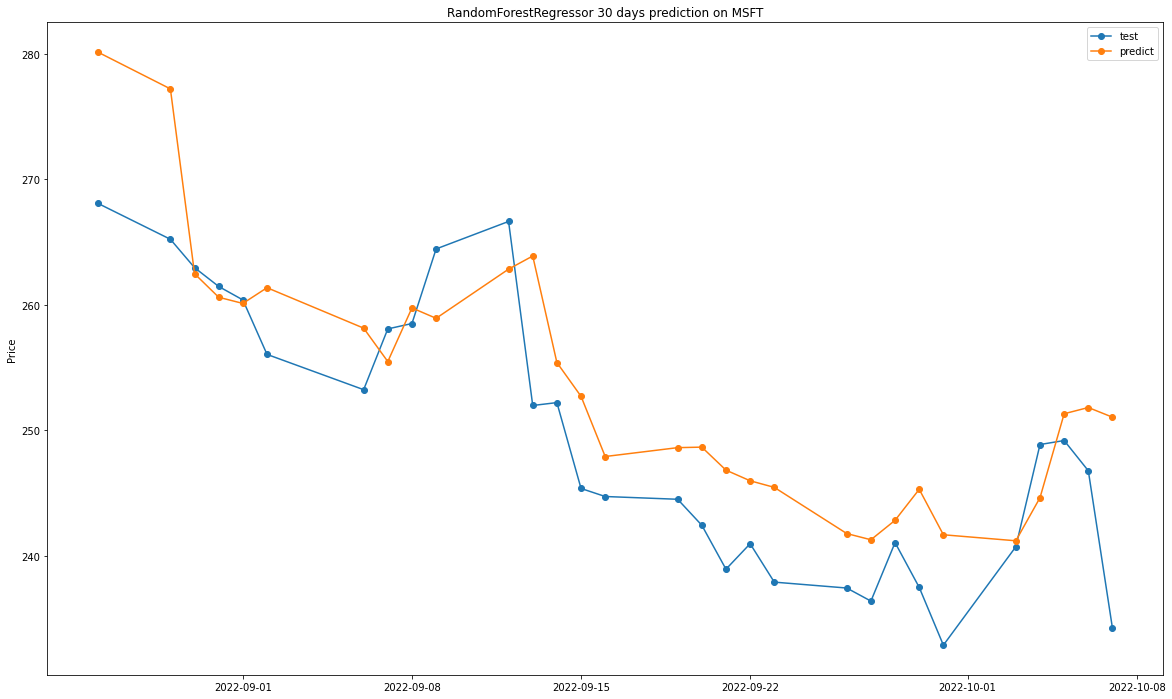

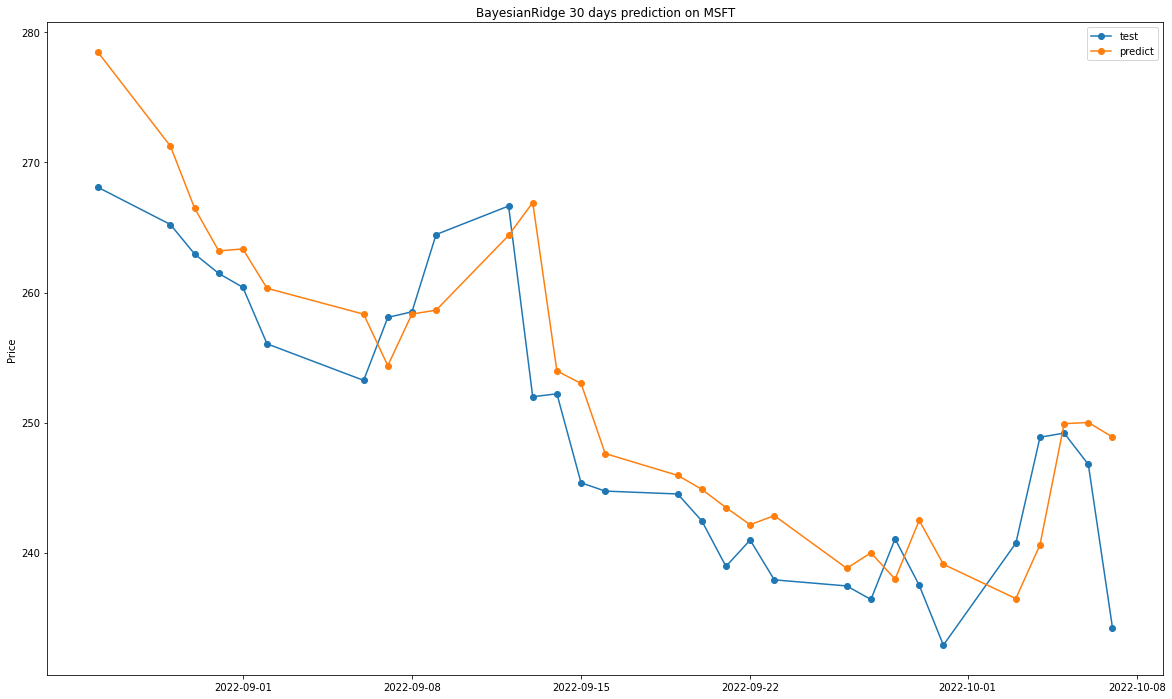

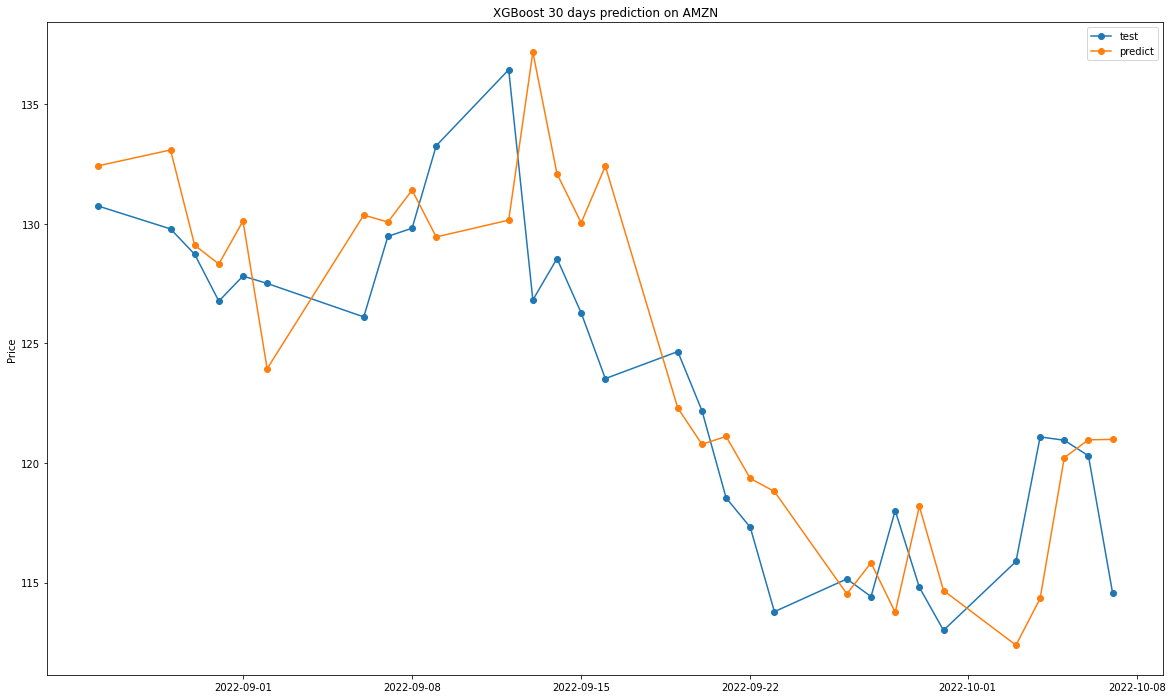

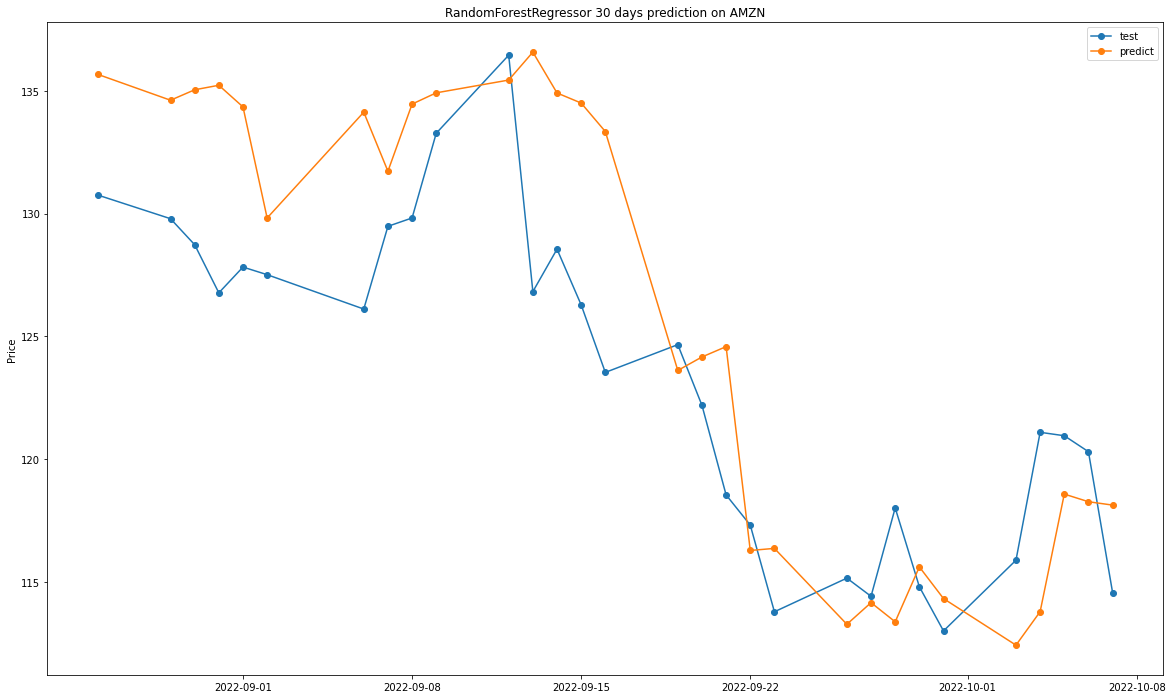

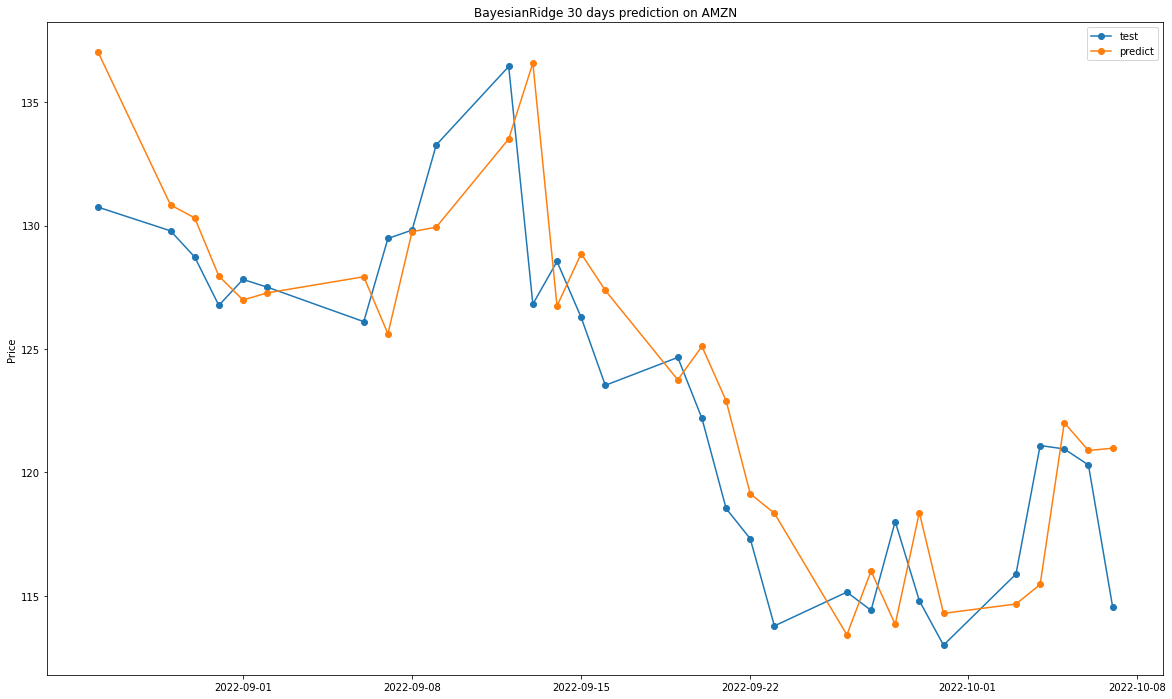

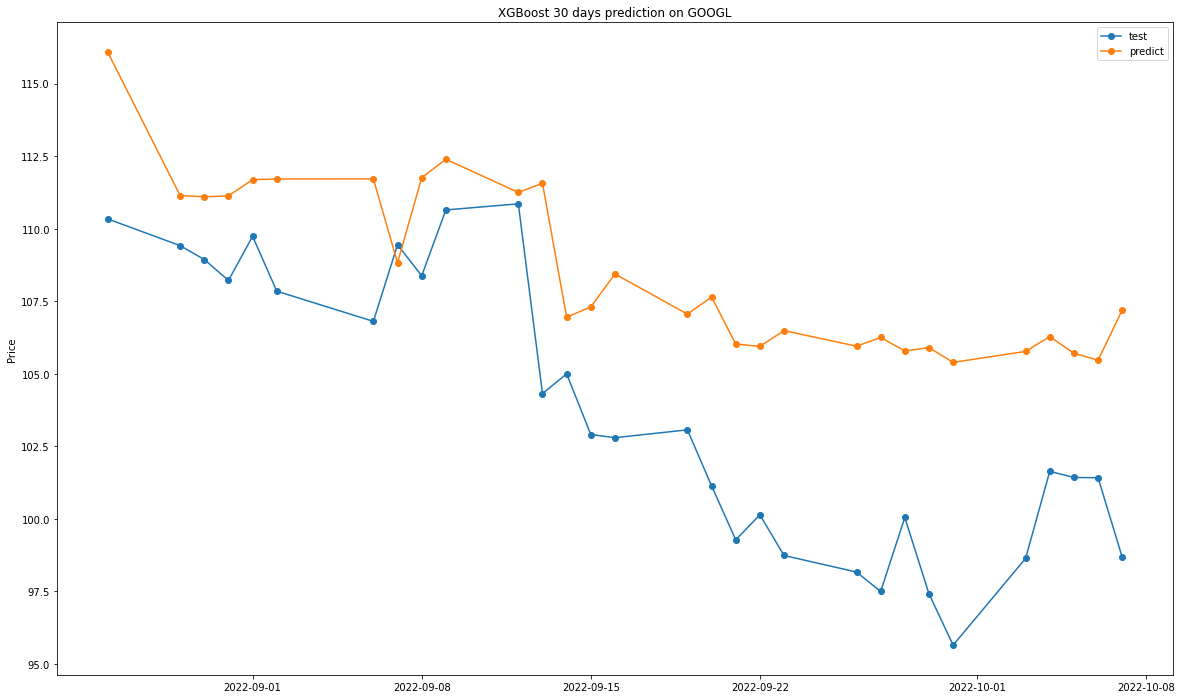

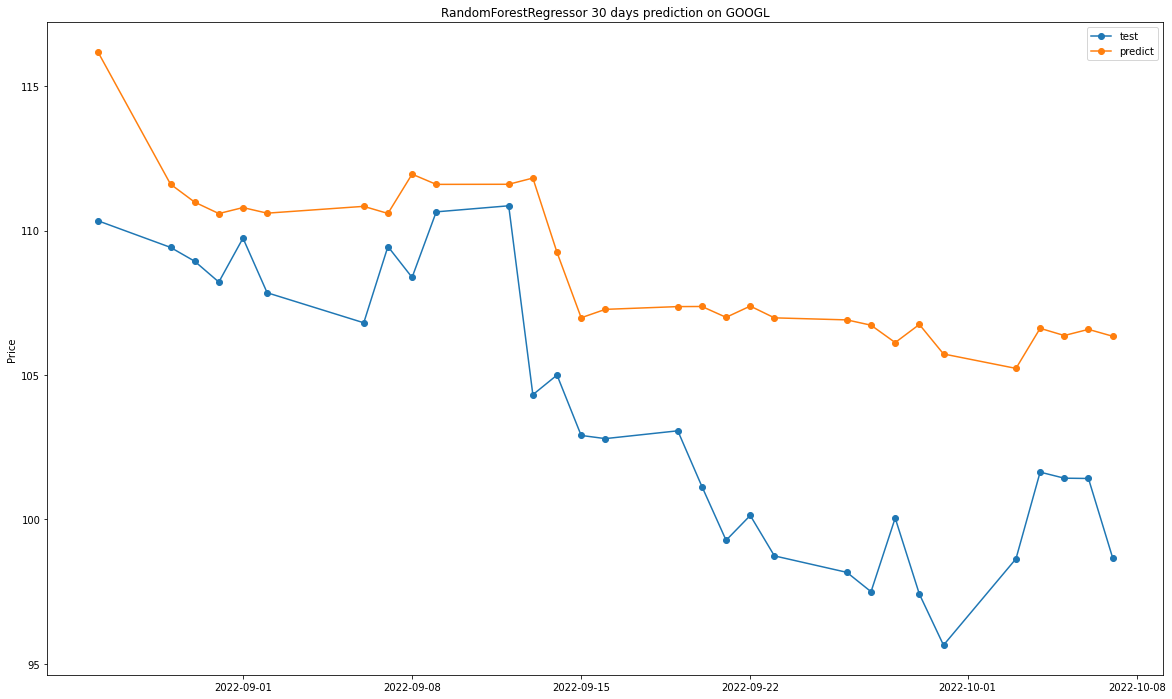

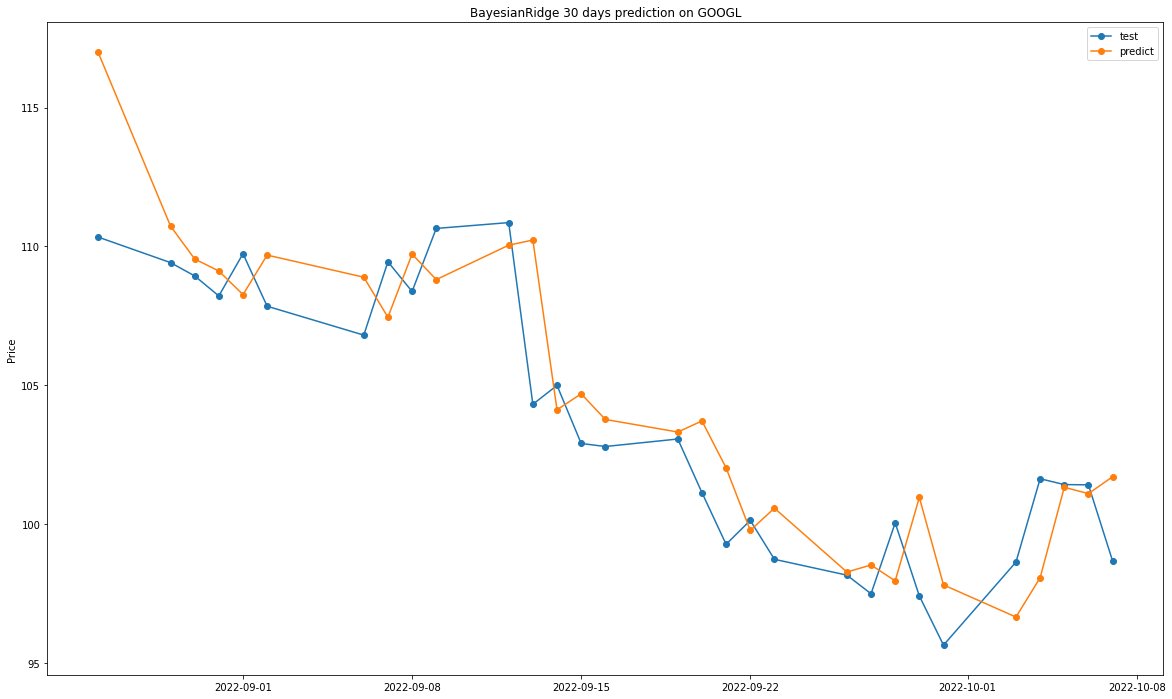

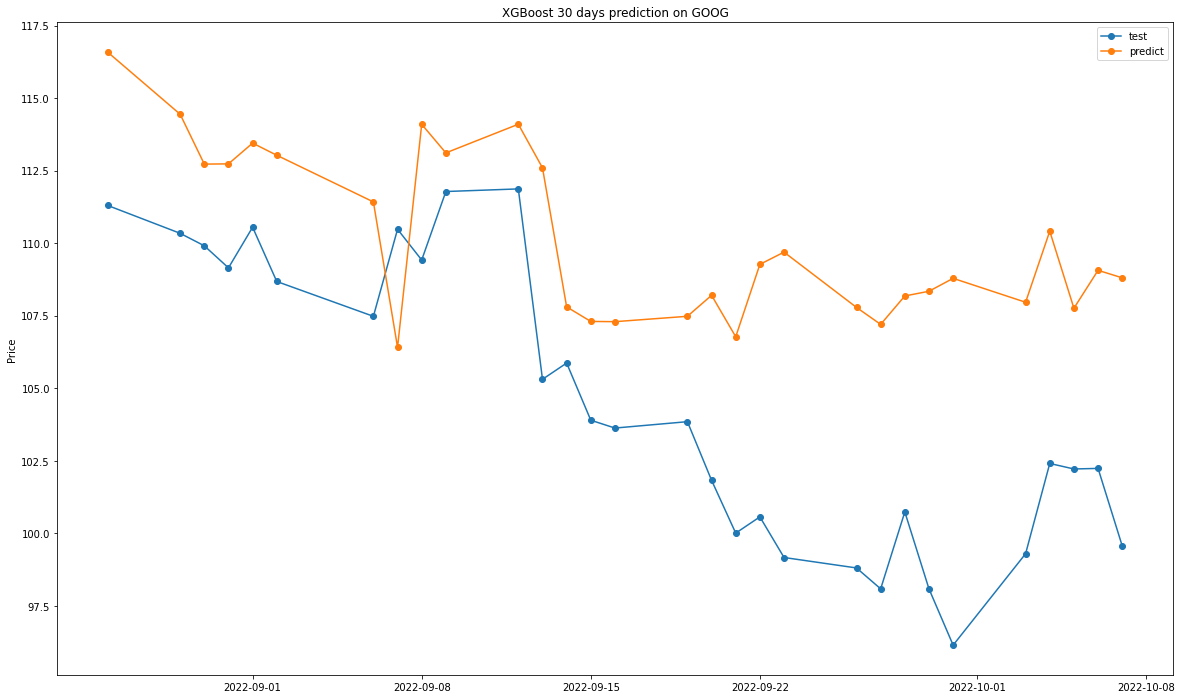

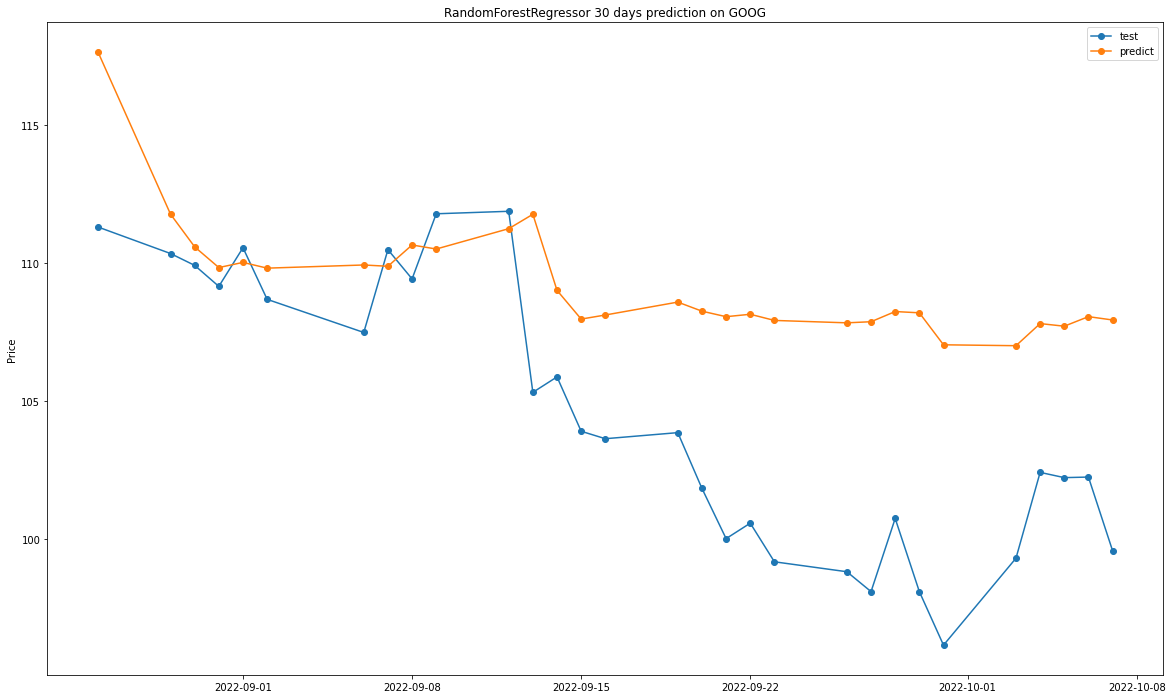

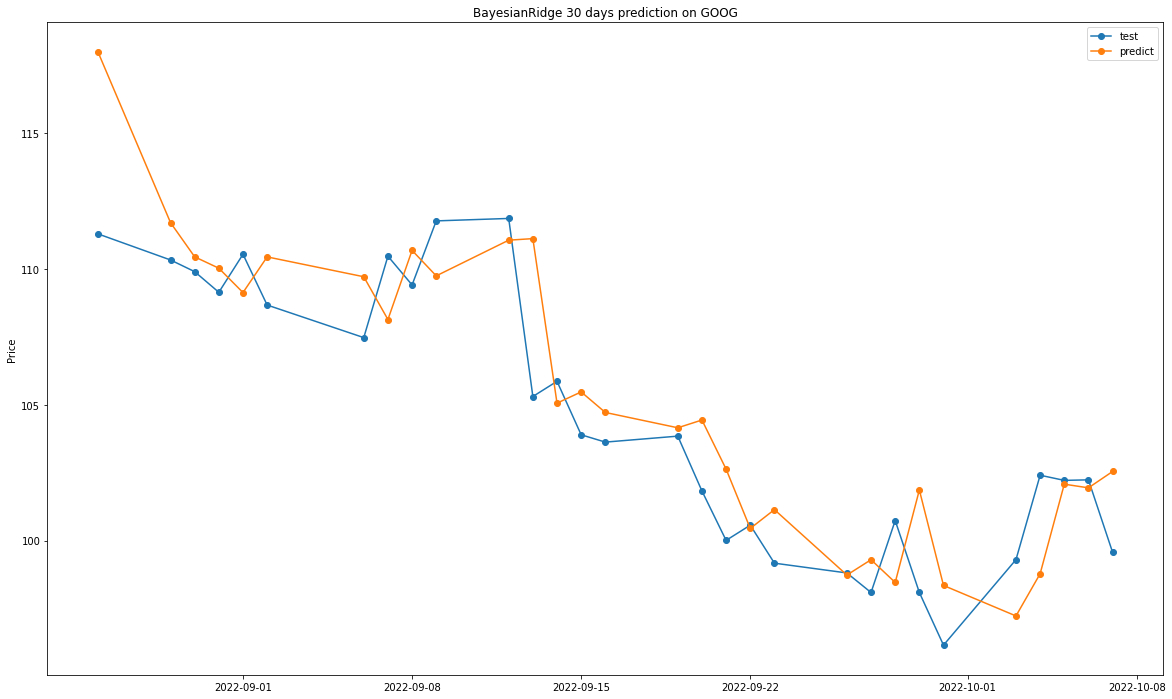

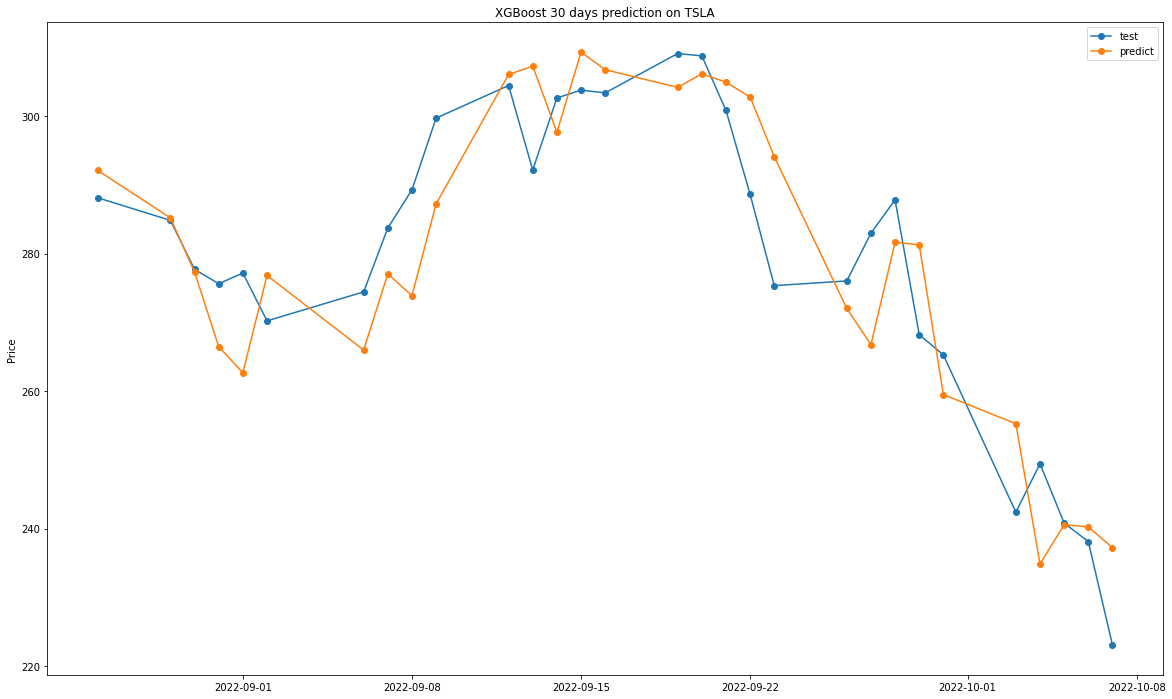

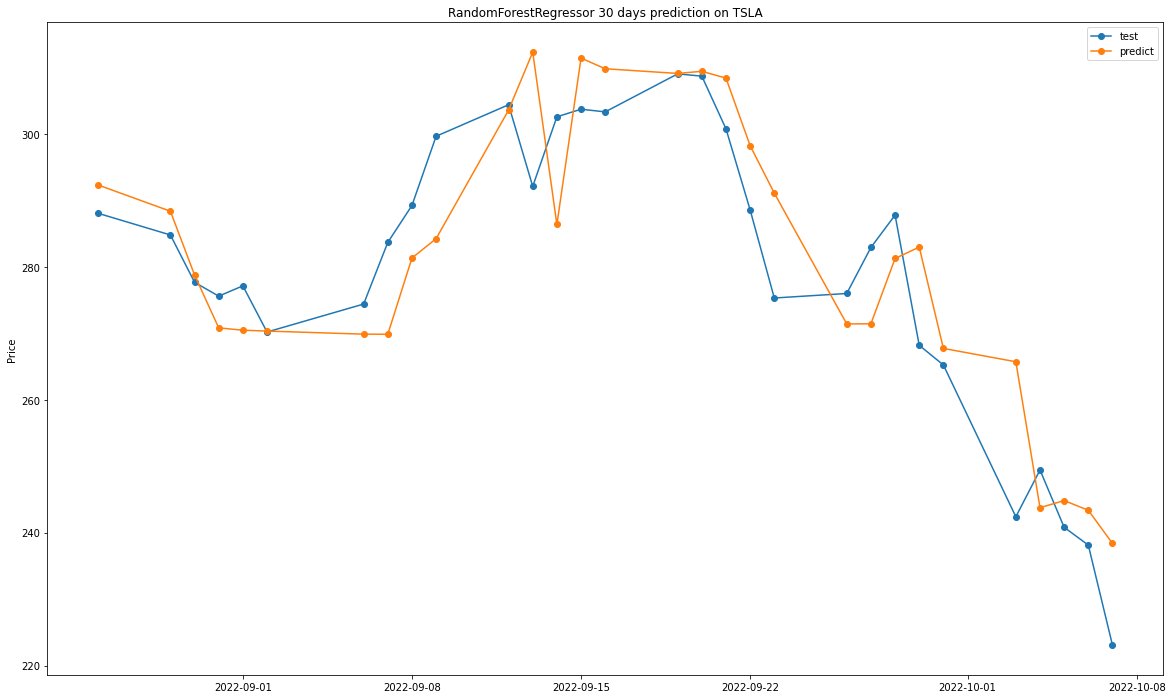

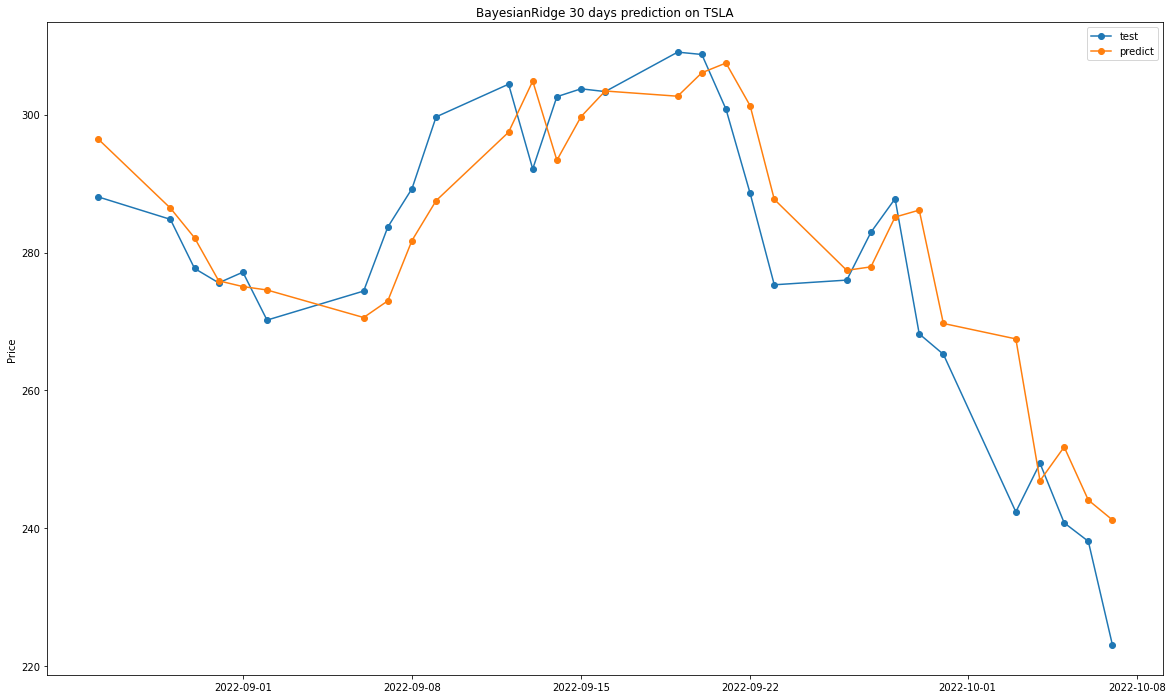

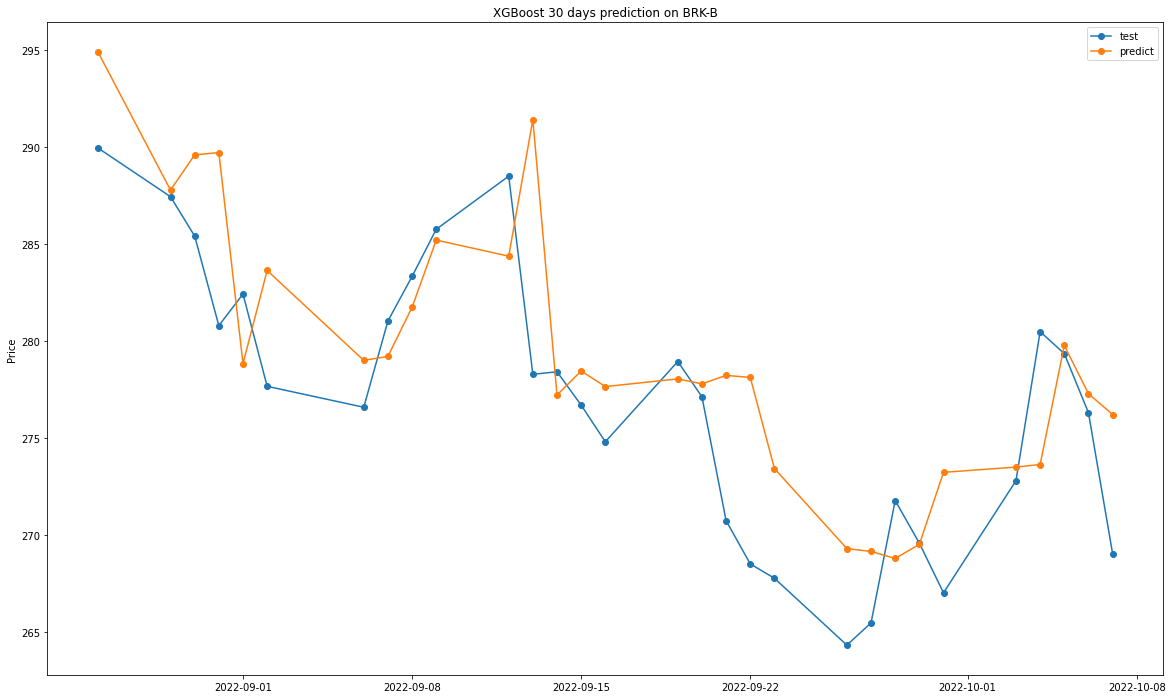

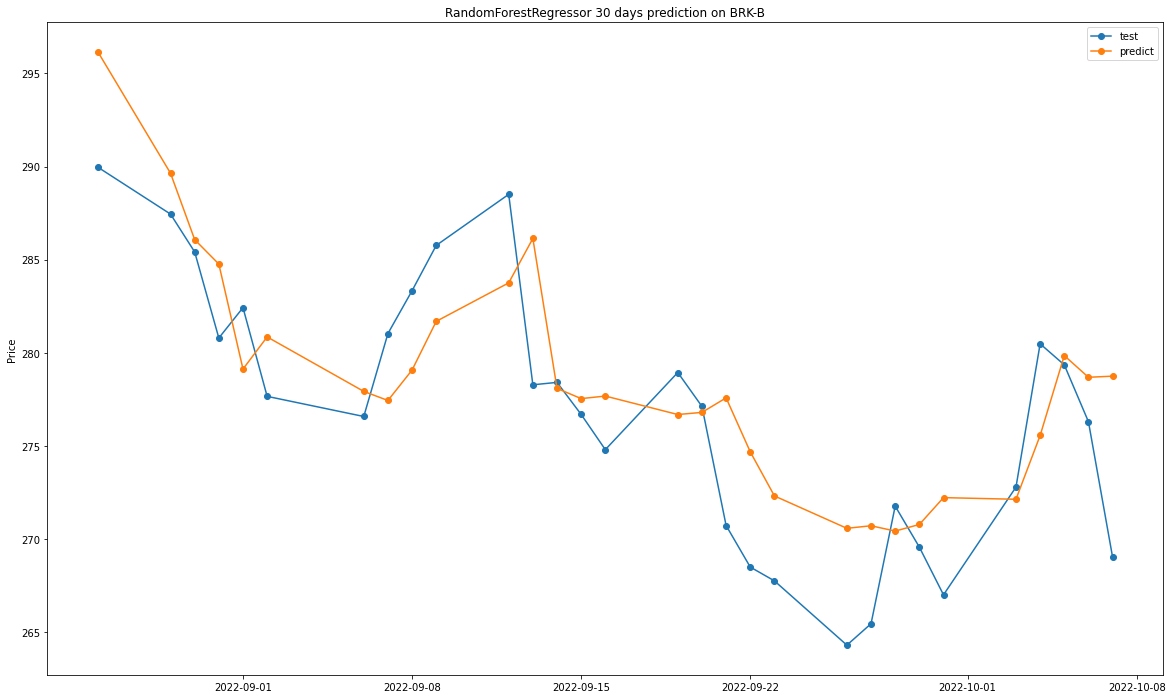

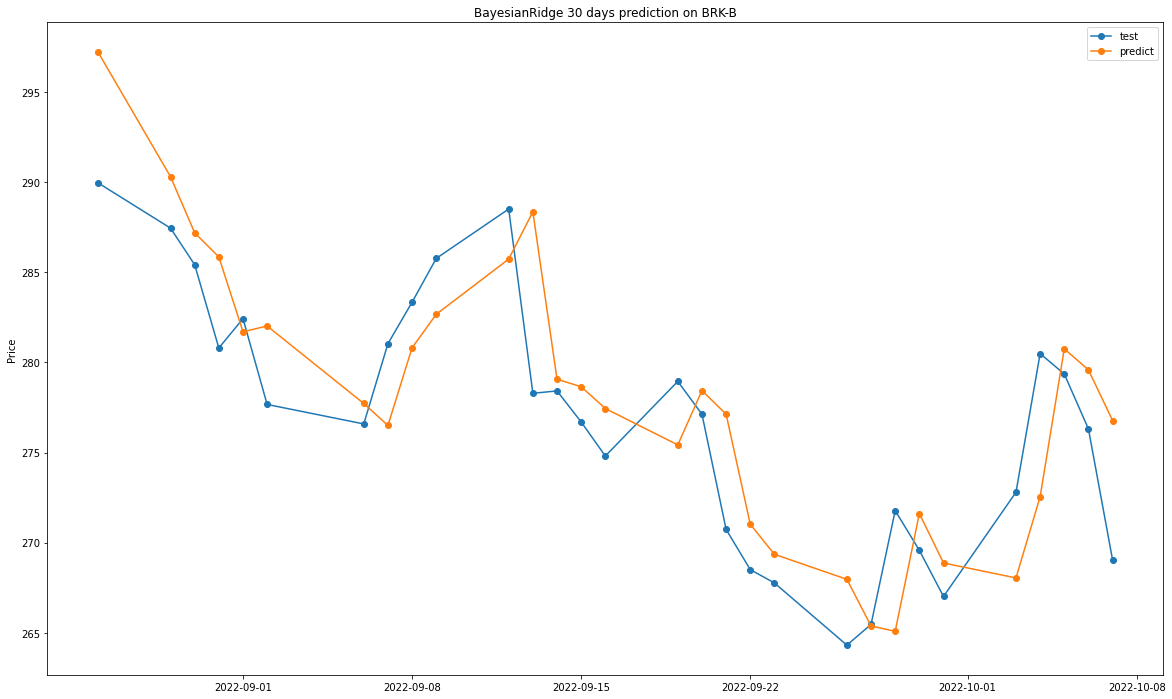

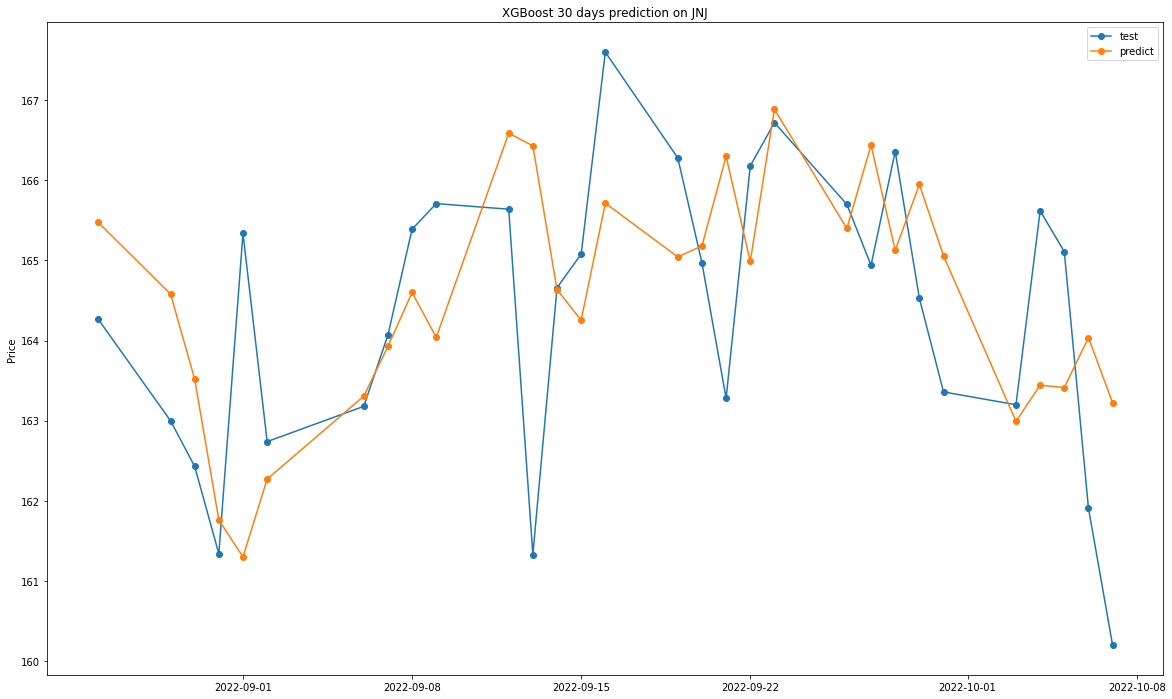

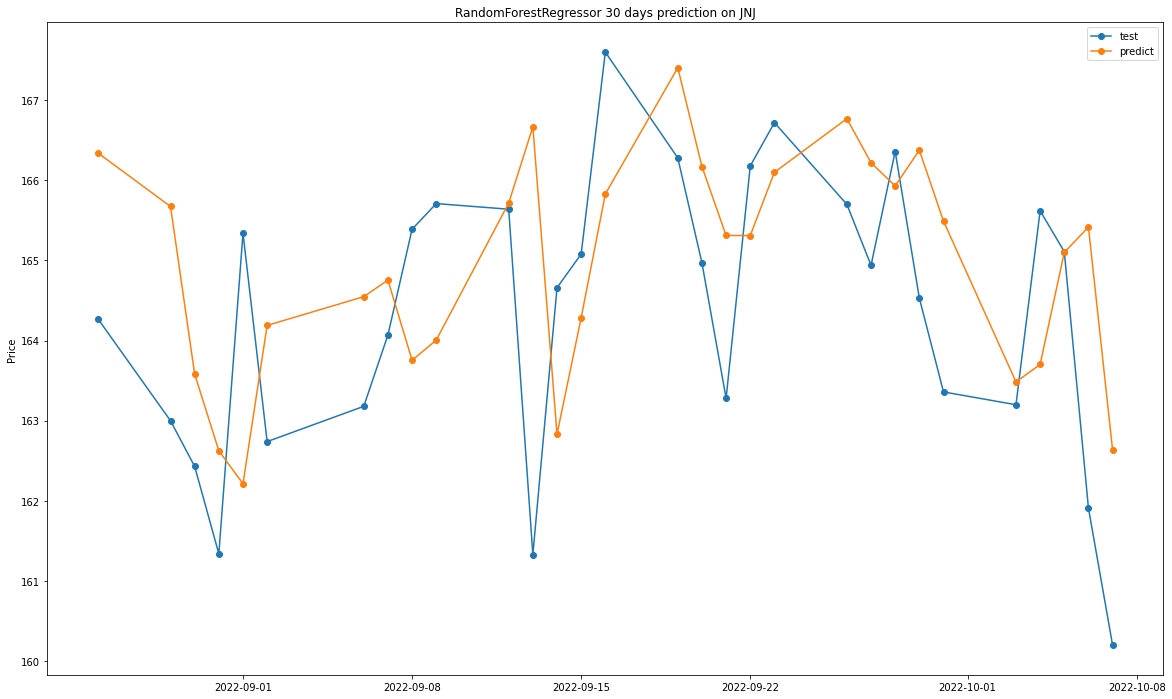

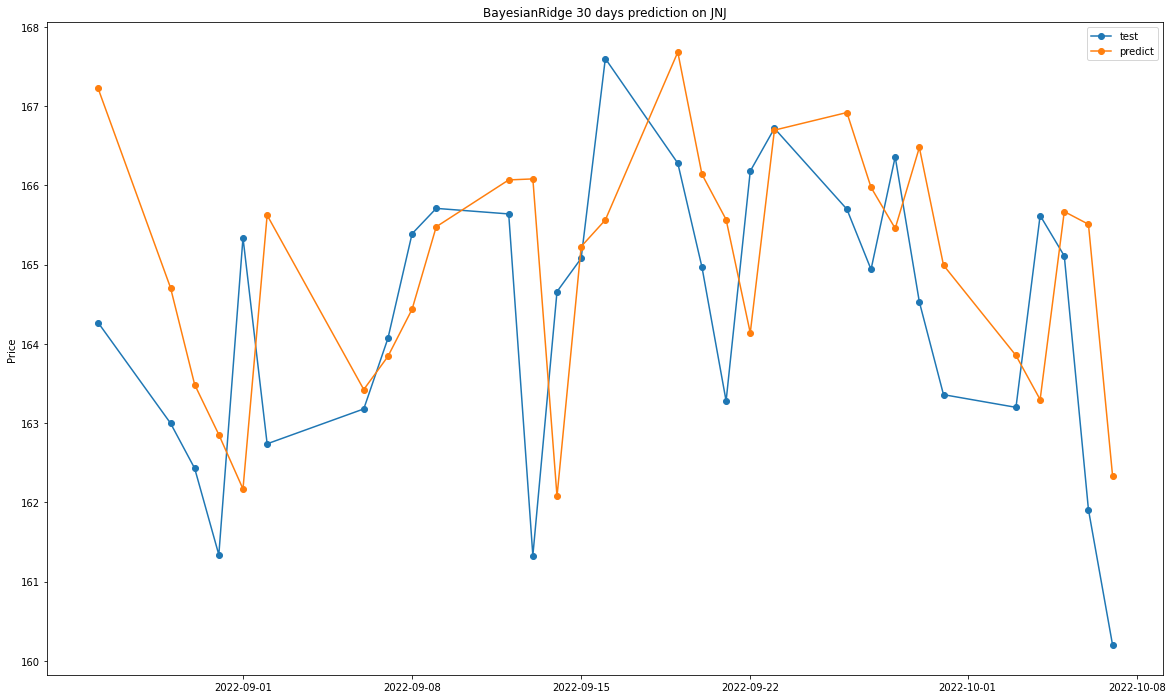

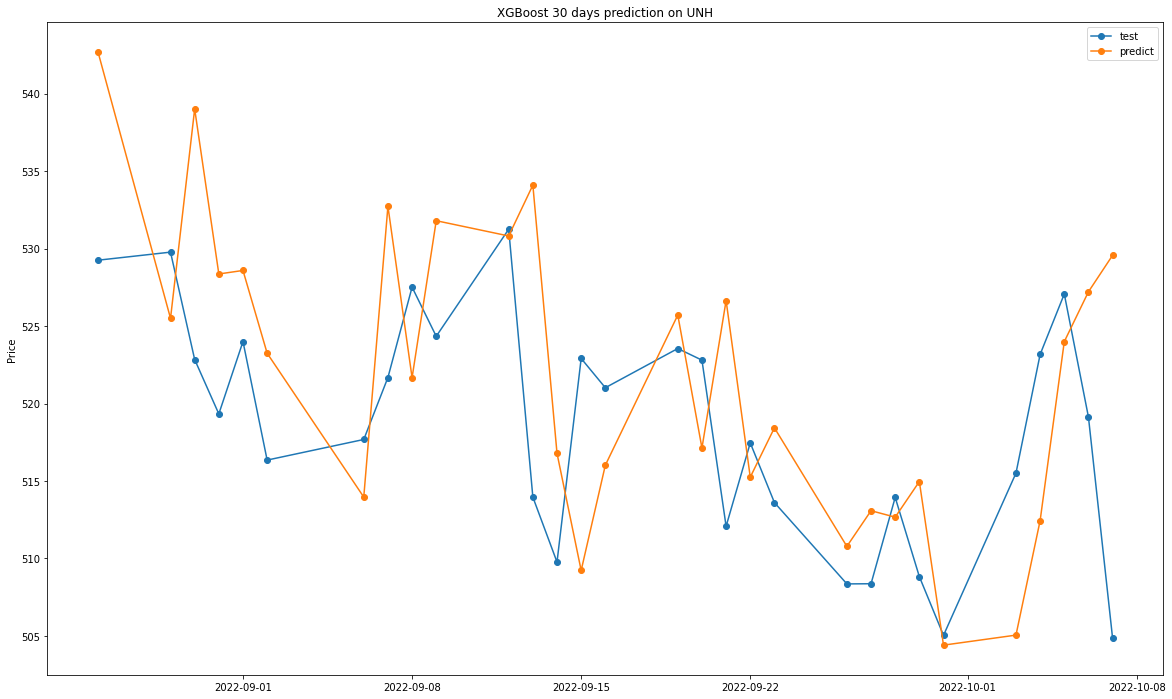

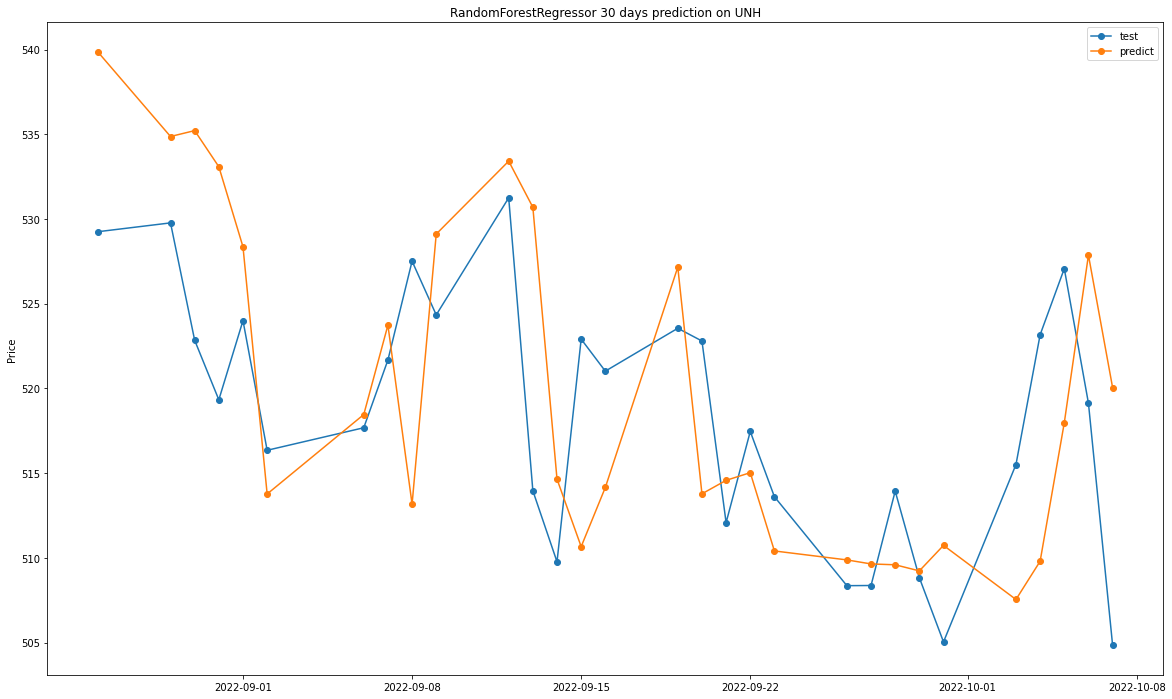

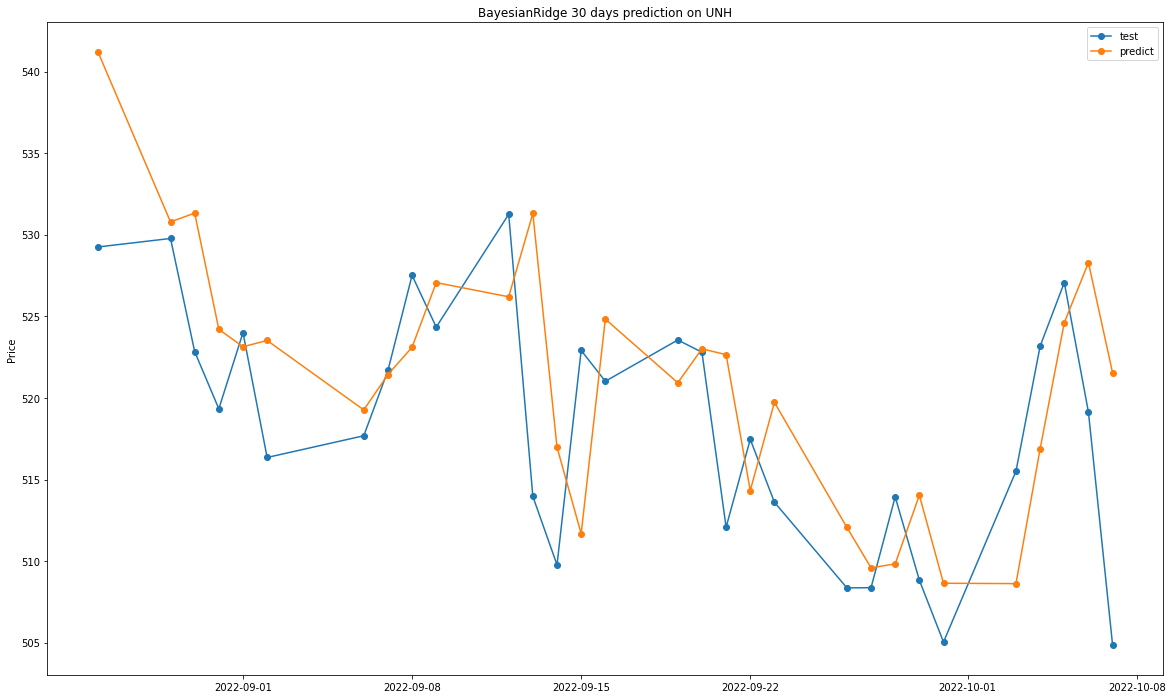

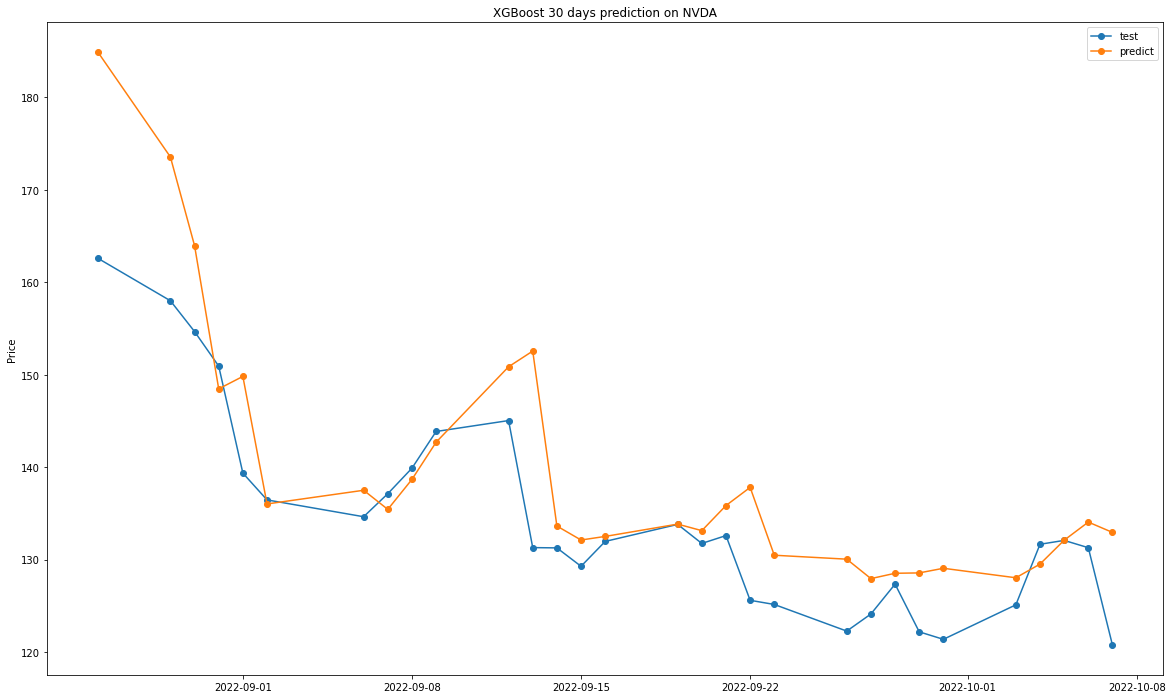

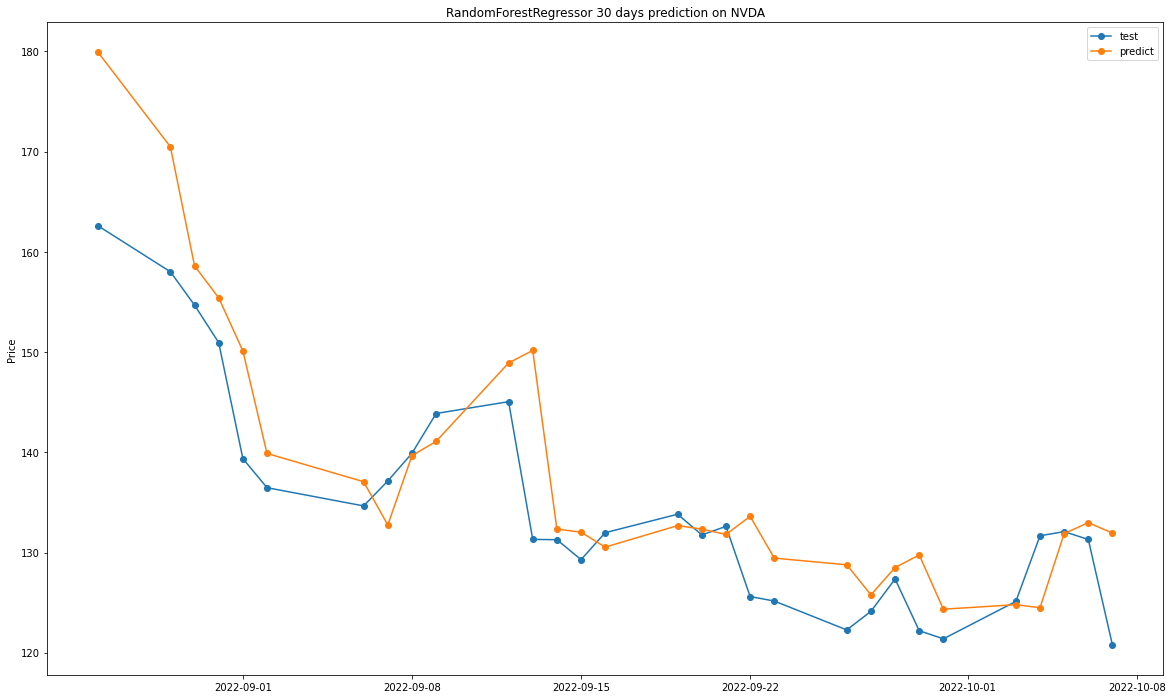

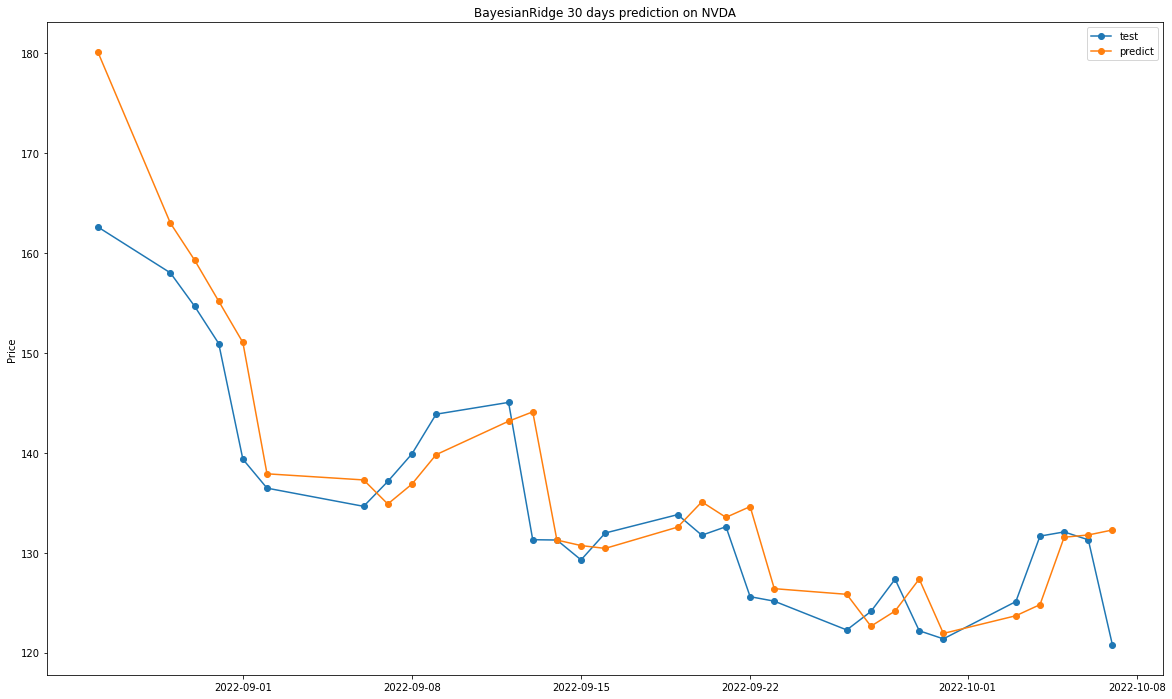

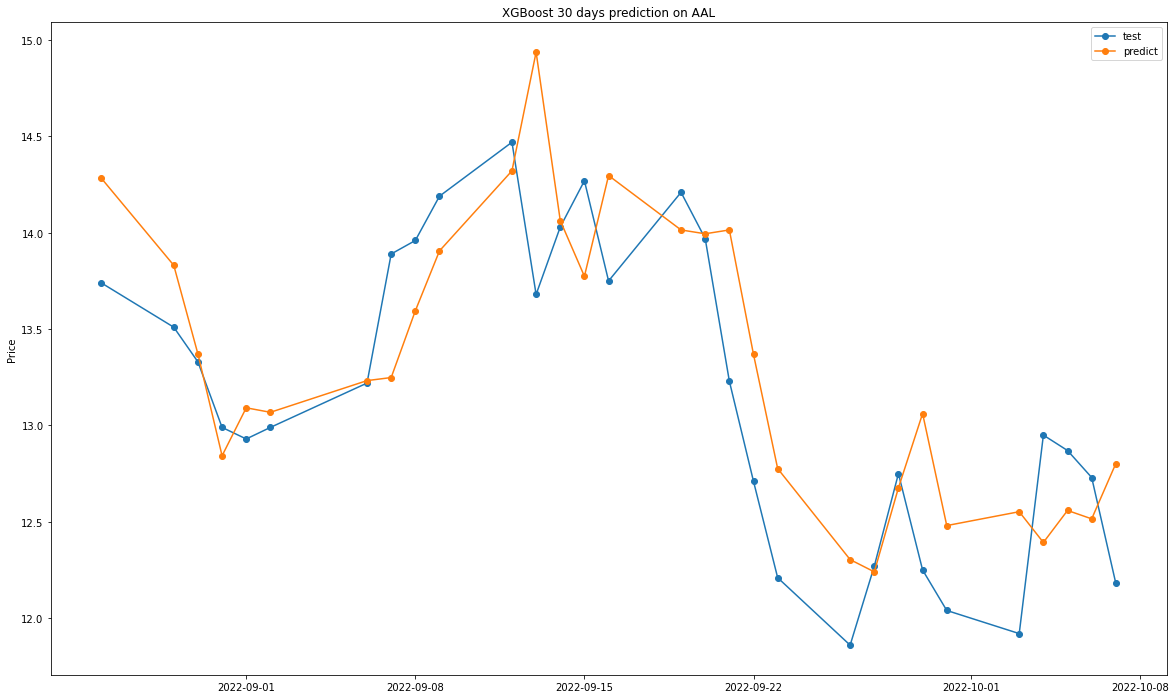

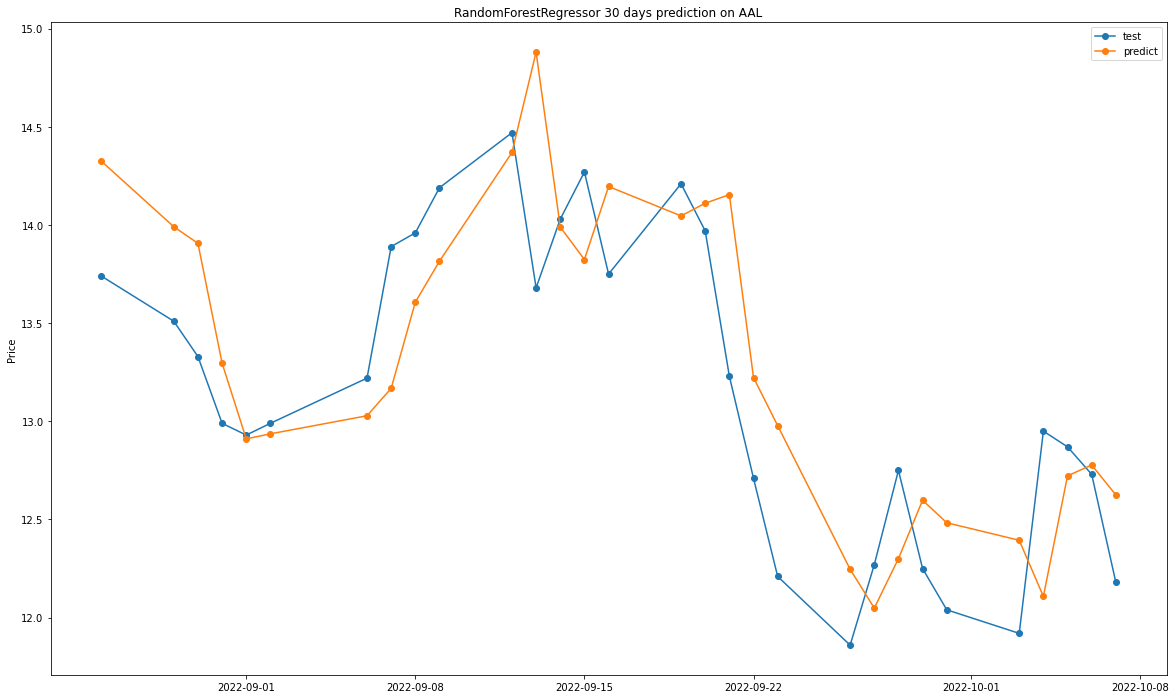

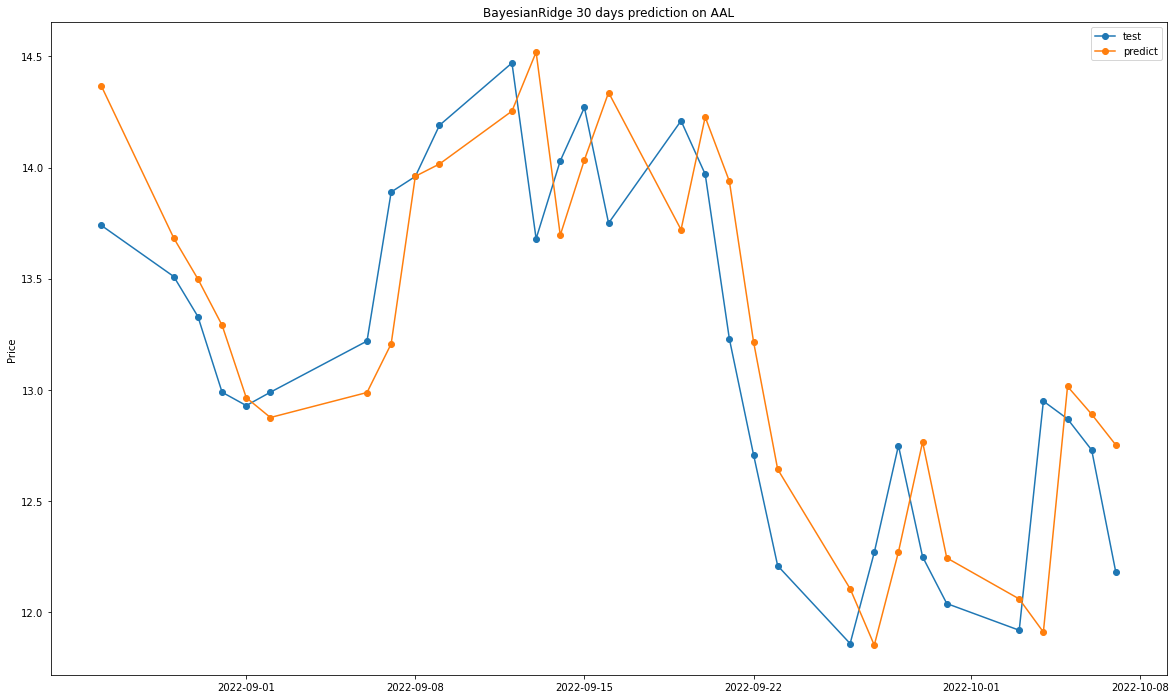

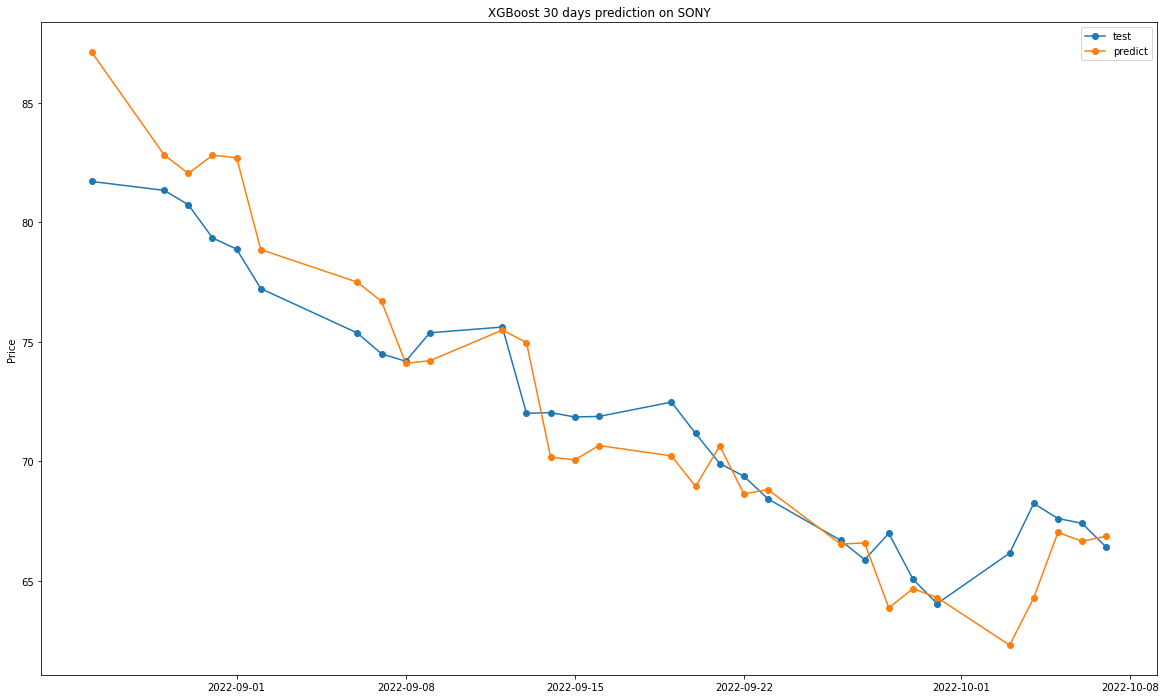

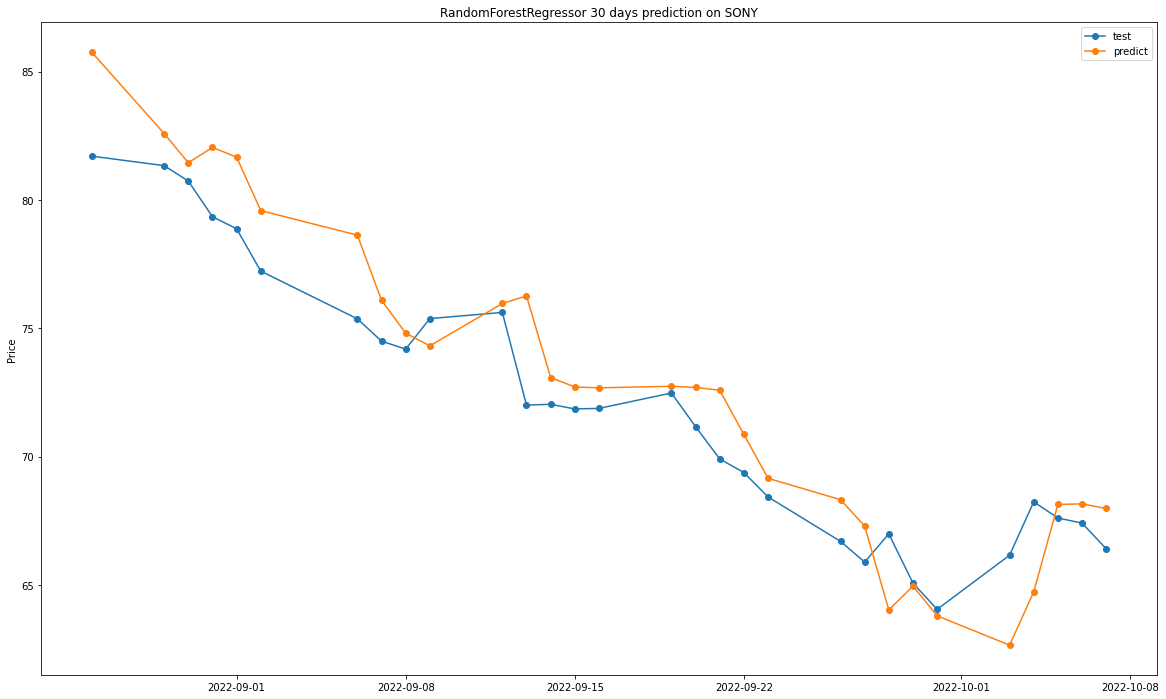

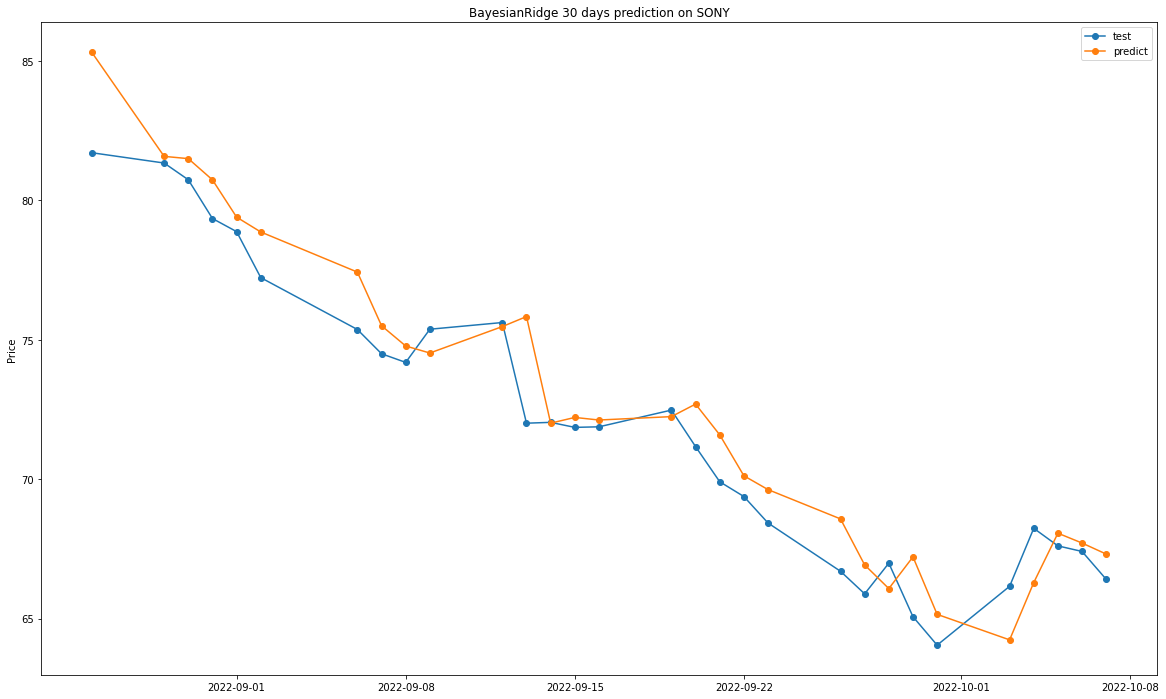

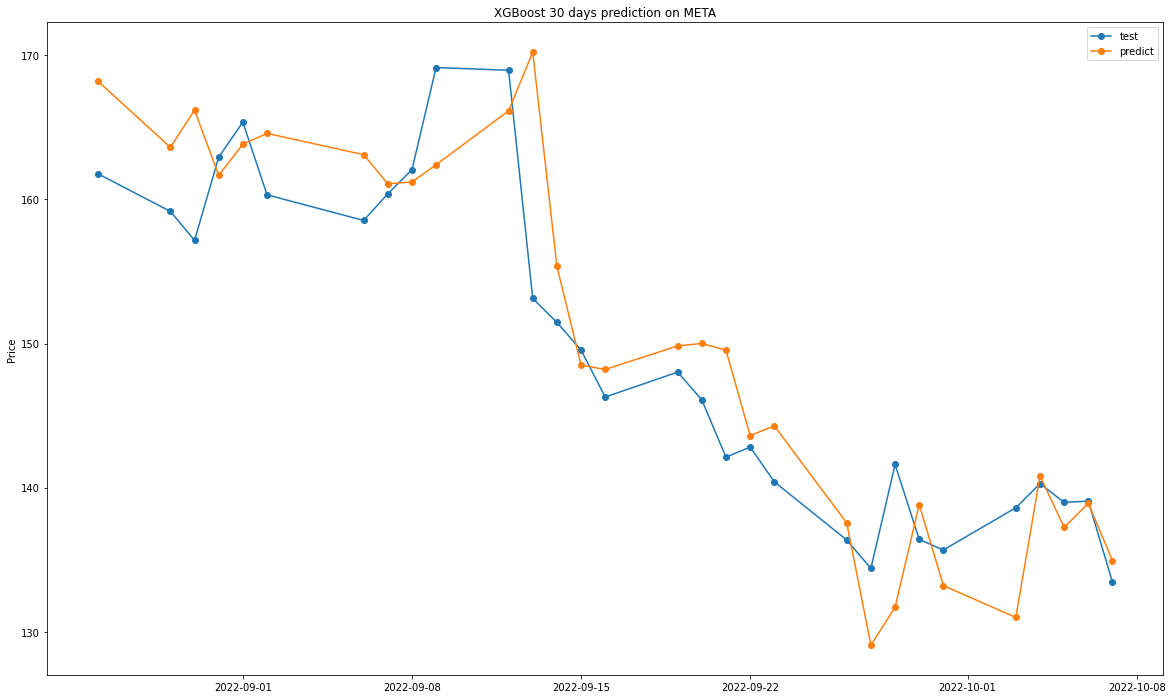

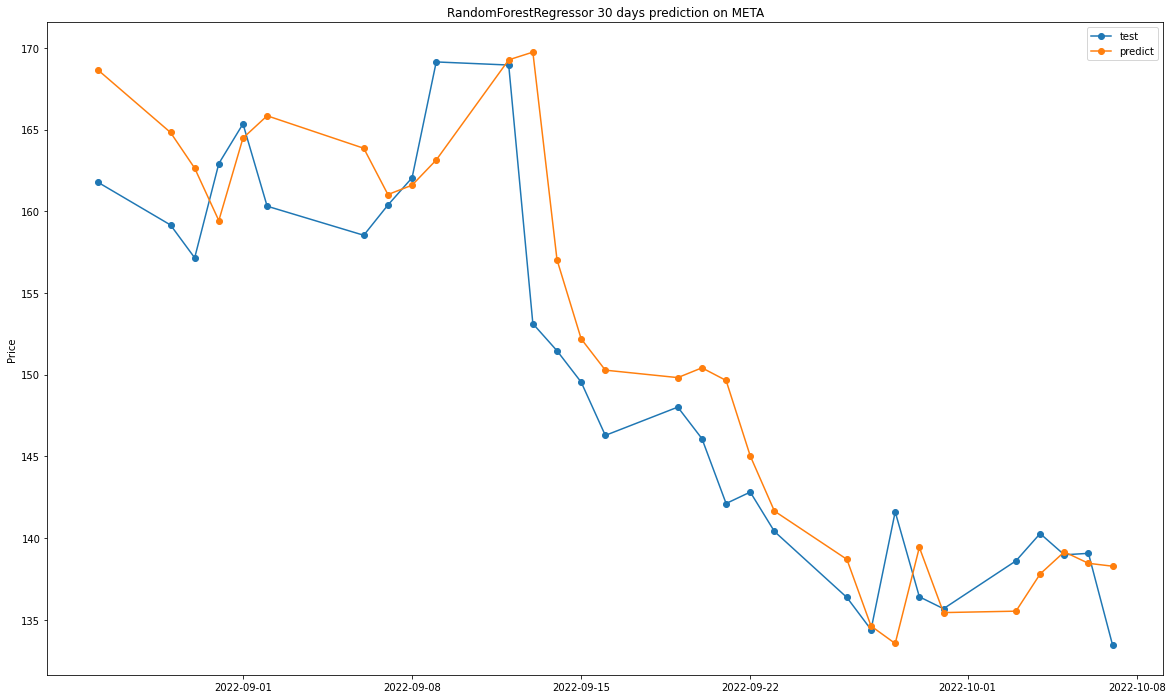

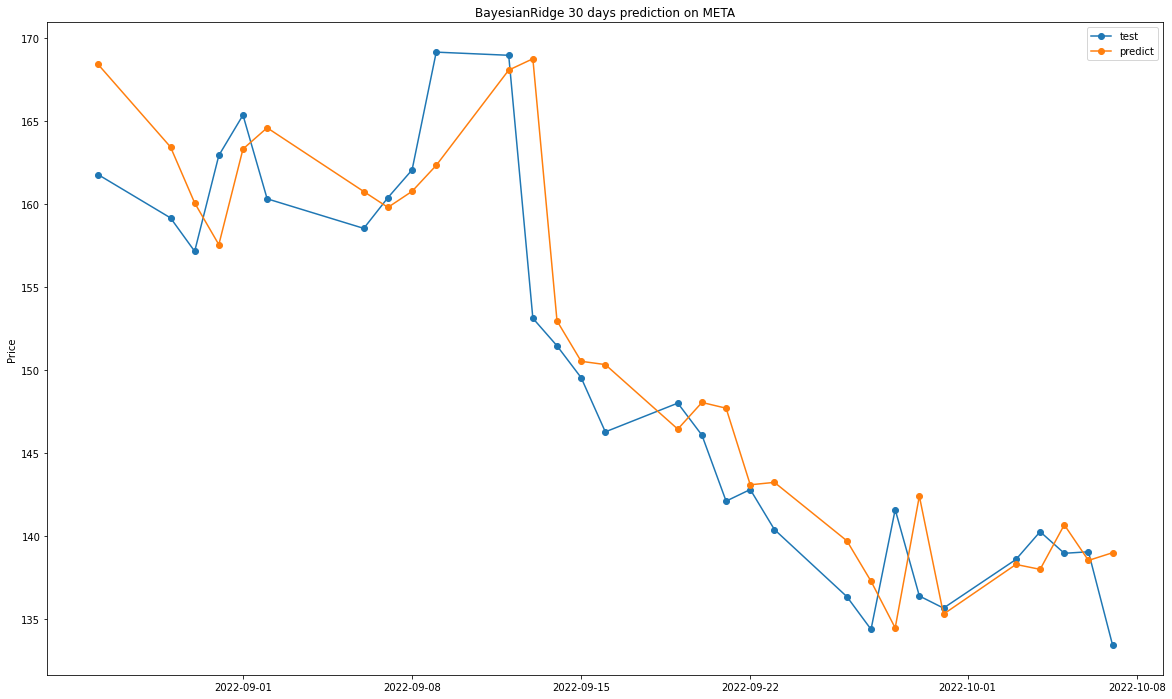

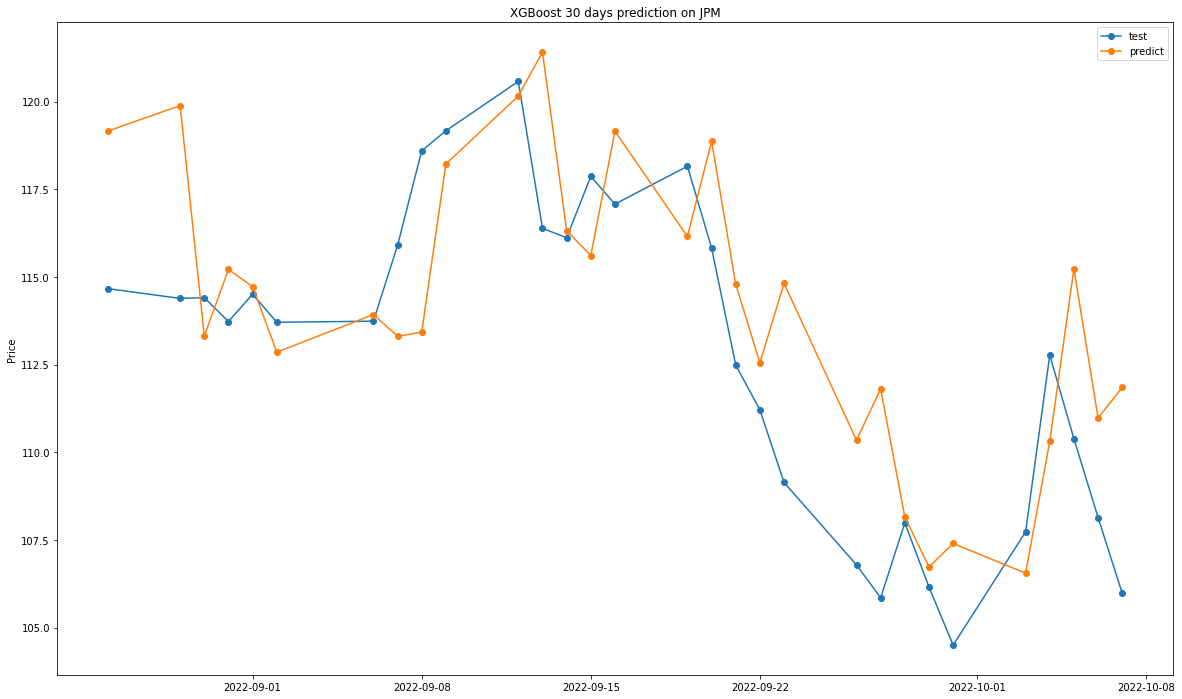

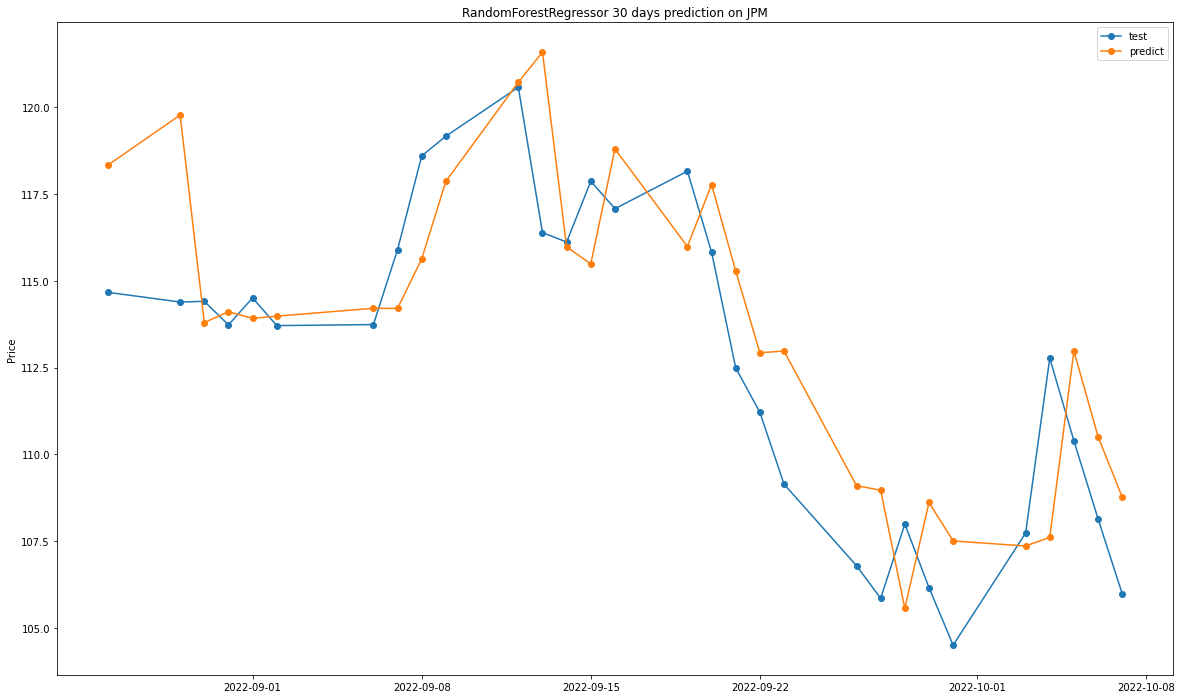

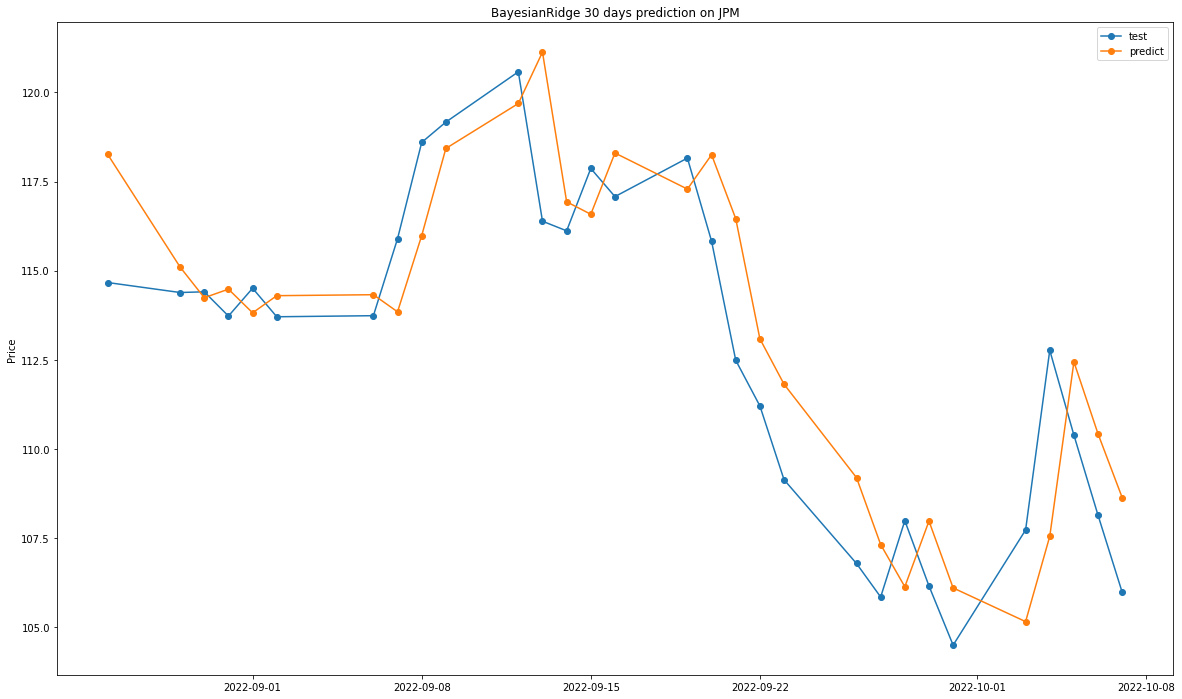

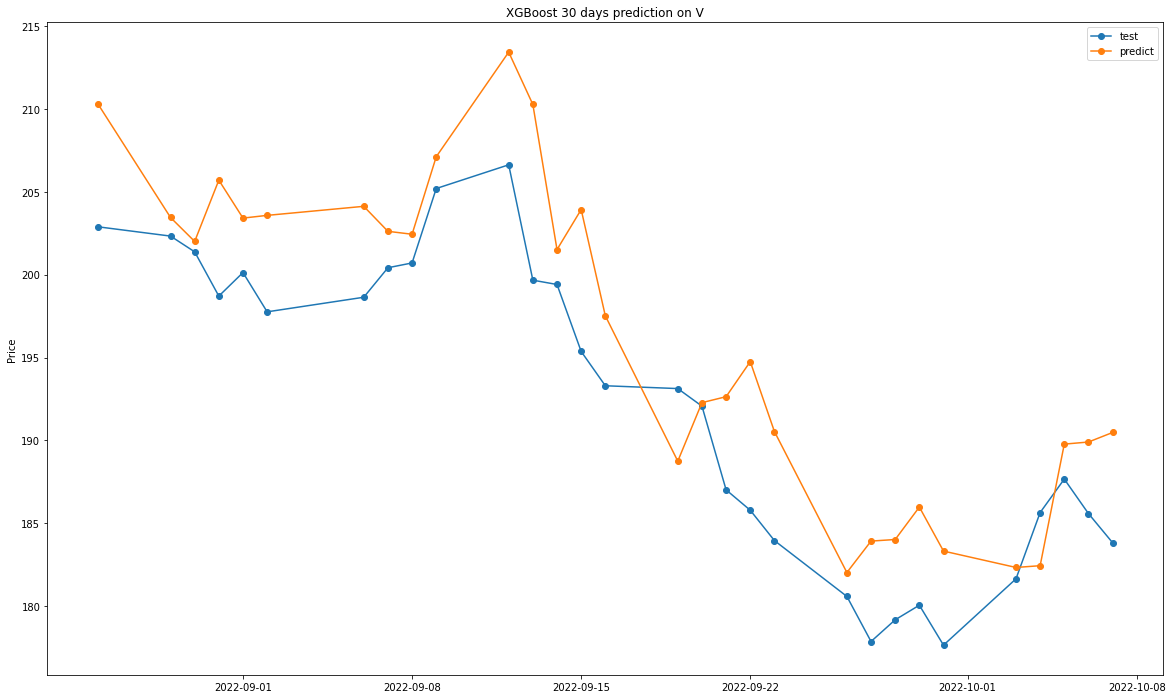

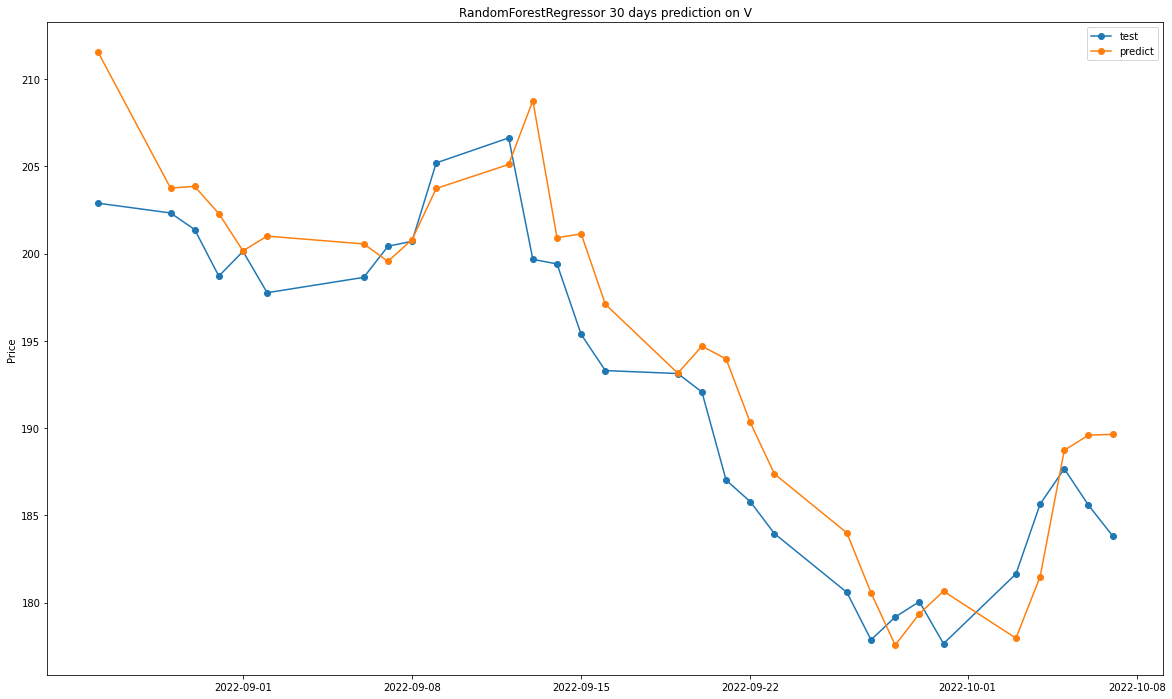

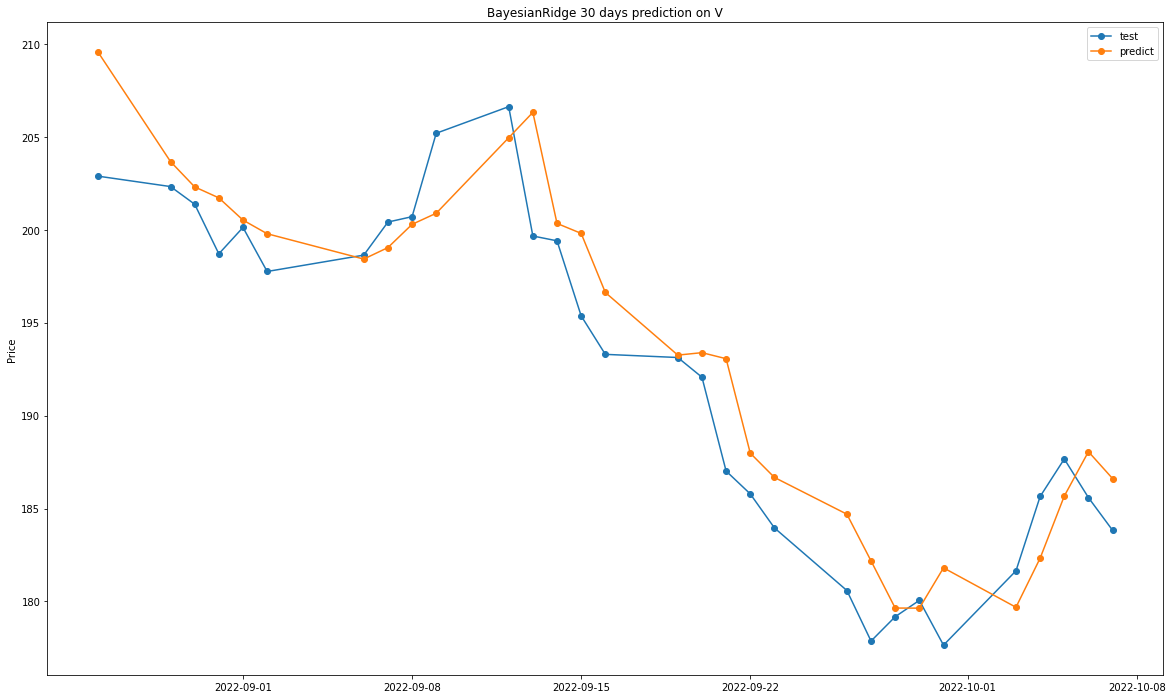

In [4]:
stock_names = []
mdl_names = []
r2s = []
mses = []
maes = []
mapes = []
run_times = []
df_init_results = pd.DataFrame(columns=['Stock'])
for stk, data in zip(stocks, trading_datas):
    #print (stk)
    if __name__ == '__main__':
        stock_data = data
        STD_periods = [7]
        SMA_periods = [7, 14, 30, 50]
        SMA_envelope_range_percentage = 5
        EMA_period = 8
        MACD_shortPeriod = 12
        MACD_longPeriod = 26
        MACD_signalPeriod = 9
        RSI_period = 14
        Stoch_periods = [14, 14, 14, 14] #RSI, StochRSI, %K(max), %D(min)
        KDJ_periods = [14, 14]

        tis = Technical_Indicators(stock_data, STD_periods, SMA_periods, SMA_envelope_range_percentage, EMA_period, MACD_shortPeriod, MACD_longPeriod, MACD_signalPeriod, RSI_period, Stoch_periods, KDJ_periods)
        stock_results = tis.main()
        result_names = str(stk)
        df_technical_data = stock_results.dropna(axis=0)
        
        #df_technical_data = df_technical_data.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
        

    prediction_days = 50
    future_days = 30
    df_data = pd.DataFrame(columns=['Close'], index = df_technical_data.tail(df_technical_data.shape[0]).index[prediction_days:len(df_technical_data)].tolist())

    for col in df_technical_data.columns: #,'SMA','MACD_Signal','RSI' 
        #df_data['Close'] = df_technical_data.iloc[prediction_days: (len(df_technical_data[col])),:]['Close'].tolist()
        #col_nam = str(col)+str('-1')
        #df_data[col_nam] = df_technical_data.iloc[prediction_days-1: (len(df_technical_data[col])-1),:][col].tolist()
        
        if col == 'Close':
            df_data['Close'] = df_technical_data.iloc[prediction_days: (len(df_technical_data[col])),:]['Close'].tolist()
            
            prediction_day = 7
            for index_init in range(prediction_day):
                rolling_data = df_technical_data.iloc[index_init: index_init+(len(df_technical_data[col]) - prediction_days),:][col].tolist()
                col_name = str(col)+str(index_init-prediction_day)
                df_data[col_name] = rolling_data
        else:
            col_nam = str(col)+str('-1')
            df_data[col_nam] = df_technical_data.iloc[prediction_days-1: (len(df_technical_data[col])-1),:][col].tolist()
        
    
    
    XGB = XGBRegressor()
    RFR = RandomForestRegressor()
    #SGD = SGDRegressor()
    BYR = BayesianRidge()
    #LAS = Lasso()
    #SVR = svm.SVR(kernel="poly")

    models = [XGB, 
              RFR,
              #SVR,
              #SGD,
              BYR,
              #LAS
             ]
    model_names = ['XGBoost', 
                   'RandomForestRegressor',
                   #'SupportVectorRegressor',
                   #'SGDRegressor',
                   'BayesianRidge',
                   #'Lasso'
                  ]
    
    time_set_num = 1
    data_length = len(df_data)
    
    for model, mdl_name in zip(models, model_names):
        if mdl_name == 'SGDRegressor':
            SGD_pipline = make_pipeline(StandardScaler(),
                                        SGDRegressor(max_iter=1000, tol=1e-3)
                                       )
            model = SGD_pipline
        for i in range(1, time_set_num+1):
            df_train_period = df_data.iloc[future_days*(i-1): data_length-future_days*(time_set_num-(i-1)), :]
            df_test_period = df_data.iloc[data_length-future_days*(time_set_num-(i-1)): data_length-future_days*(time_set_num-(i)), :]

            x_train = df_train_period[df_train_period.columns.drop('Close').tolist()]
            y_train = df_train_period['Close']
            x_test = df_test_period[df_test_period.columns.drop('Close').tolist()]
            y_test = df_test_period['Close']
            
        mdlst = time.time()     
        model.fit(x_train, y_train)
        predict_test = model.predict(x_test)
        mdled = time.time()
        
        r2_scr = r2_score(y_test, predict_test)
        mse = mean_squared_error(y_test, predict_test)
        mae = mean_absolute_error(y_test, predict_test)
        mape = mean_absolute_percentage_error(y_test, predict_test)

        mdl_names.append(mdl_name)
        stock_names.append(stk)
        r2s.append(r2_scr)
        mses.append(mse)
        maes.append(mae)
        mapes.append(mape)
        run_times.append(mdled-mdlst)
            
        fig, ax = plt.subplots(figsize=(20,12))
        ax.plot(y_test.index.tolist(), y_test,'o-', label='test',)
        ax.plot(y_test.index.tolist(), predict_test, 'o-', label='predict')
        ax.set_title(str(mdl_name)+' '+str(future_days)+' days prediction on '+str(stk))
        ax.set_ylabel('Price')
        ax.legend()
            

df_init_results['Model'] = mdl_names
df_init_results['Stock'] = stock_names
df_init_results['R^2'] = r2s
df_init_results['MSE'] = mses
df_init_results['MAE'] = maes
df_init_results['MAPE'] = mapes
df_init_results['Running Time'] = run_times

In [5]:
df_init_results

,Stock,Model,R^2,MSE,MAE,MAPE,Running Time
0,AAPL,XGBoost,0.483788,20.828955,3.840954,0.024970,1.975682
1,AAPL,RandomForestRegressor,0.641549,14.463356,3.267063,0.021316,5.852889
2,AAPL,BayesianRidge,0.679458,12.933733,2.845378,0.018722,0.057989
3,MSFT,XGBoost,0.160906,93.308451,8.295939,0.033774,2.063293
4,MSFT,RandomForestRegressor,0.602431,44.210278,5.391326,0.021799,5.309092
5,MSFT,BayesianRidge,0.696644,33.733566,4.600189,0.018516,0.013543
6,AMZN,XGBoost,0.596369,16.706954,3.291278,0.026715,1.678735
7,AMZN,RandomForestRegressor,0.383757,25.507326,4.178892,0.033615,5.467707
8,AMZN,BayesianRidge,0.702678,12.306632,2.768391,0.022579,0.008836
9,GOOGL,XGBoost,-0.404170,30.970214,4.953536,0.048854,1.393731


# Genetic Algorithm Hyperparameter Tuning

In [6]:
#def get_mod_pars():
mod_par_dic = xgb.XGBRegressor().get_xgb_params()
mod_par_list = [par for par in mod_par_dic.keys()]
mod_par_list

['objective',
 'base_score',
 'booster',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'gamma',
 'gpu_id',
 'interaction_constraints',
 'learning_rate',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'monotone_constraints',
 'n_jobs',
 'num_parallel_tree',
 'random_state',
 'reg_alpha',
 'reg_lambda',
 'scale_pos_weight',
 'subsample',
 'tree_method',
 'validate_parameters',
 'verbosity']

In [7]:
pars = [0.89, 10, 0.24, 430, 9, 17, 0.64]
model = XGBRegressor()
model_pars = [model.colsample_bytree, 
              #model.colsample_bylevel, 
              #model.colsample_bynode,
              model.gamma, 
              model.learning_rate, 
              model.n_estimators,
              model.max_depth, 
              model.min_child_weight, 
              model.subsample, ]

#for i,j in zip(pars,model_pars):
    
model_pars


[None, None, None, 100, None, None, None]

In [8]:
par_tuning = ['colsample_bytree', 
              #'colsample_bylevel', 
              #'colsample_bynode',
              'gamma', 
              'learning_rate', 
              'n_estimators',
              'max_depth', 
              'min_child_weight', 
              'subsample', ]

tuning_ranges = [[round(num, 2) for num in np.arange(0.01, 1.01, 0.01)], 
                 [round(num, 1) for num in np.arange(1, 11, 1)], 
                 [round(num, 2) for num in np.arange(0.01, 1.01, 0.01)], 
                 [round(num, 1) for num in np.arange(50, 510, 10)], 
                 [round(num, 1) for num in np.arange(1, 21, 1)], 
                 [round(num, 1) for num in np.arange(1, 21, 1)], 
                 [round(num, 2) for num in np.arange(0.5, 1.01, 0.01)],]
par_dic = dict(zip(par_tuning, tuning_ranges))
par_dic

{'colsample_bytree': [0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15,
  0.16,
  0.17,
  0.18,
  0.19,
  0.2,
  0.21,
  0.22,
  0.23,
  0.24,
  0.25,
  0.26,
  0.27,
  0.28,
  0.29,
  0.3,
  0.31,
  0.32,
  0.33,
  0.34,
  0.35,
  0.36,
  0.37,
  0.38,
  0.39,
  0.4,
  0.41,
  0.42,
  0.43,
  0.44,
  0.45,
  0.46,
  0.47,
  0.48,
  0.49,
  0.5,
  0.51,
  0.52,
  0.53,
  0.54,
  0.55,
  0.56,
  0.57,
  0.58,
  0.59,
  0.6,
  0.61,
  0.62,
  0.63,
  0.64,
  0.65,
  0.66,
  0.67,
  0.68,
  0.69,
  0.7,
  0.71,
  0.72,
  0.73,
  0.74,
  0.75,
  0.76,
  0.77,
  0.78,
  0.79,
  0.8,
  0.81,
  0.82,
  0.83,
  0.84,
  0.85,
  0.86,
  0.87,
  0.88,
  0.89,
  0.9,
  0.91,
  0.92,
  0.93,
  0.94,
  0.95,
  0.96,
  0.97,
  0.98,
  0.99,
  1.0],
 'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'learning_rate': [0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15,
  0.16,
  

In [9]:
#def parameter_translator():
class GA_hyperparameter_tuning(object):
    def __init__(self, input_par_dic, model, model_par_funcs, eva_metric, eva_type, population_size, generations, pc, pm):
        self.input_par_dic = input_par_dic
        #Model Set Ups
        self.model = model
        self.model_par_funcs = model_par_funcs
        self.eva_metric = eva_metric
        self.eva_type = eva_type
        #Parameters
        self.population_size = population_size # 20 - 100
        self.generations = generations # 20 - 500
        self.pc = pc # 0.4-0.99
        self.pm = pm # 0.0001~0.1

        
    def Get_var_chromo_nums(self, par_dic):
        var_chromo_lens = []
        var_bi_maxs = []
        for key in par_dic.keys():
            binary_max = 2
            var_chromo_len = 1
            while binary_max < len(par_dic[key]):
                binary_max*=2
                var_chromo_len += 1
            var_chromo_lens.append(var_chromo_len)
            var_bi_maxs.append(binary_max)
        return var_chromo_lens, var_bi_maxs

    
    def Gene_Encode(self, chromo_len):
        pop = []
        for i in range(self.population_size):
            gene = []
            for j in range(chromo_len):
                gene.append(random.randint(0, 1))
            pop.append(gene)
        return pop
    
    
    def Binary_Decode(self, par_dic, chromosome):
        gene_lens, var_maxs = self.Get_var_chromo_nums(par_dic)
        pars = []
        cur_loc = 0
        for gene_len, j in zip(gene_lens, range(len(gene_lens))):
            gene_slice = chromosome[cur_loc: cur_loc+gene_len]
            decoded_par = 0
            for k in range(len(gene_slice)):
                decoded_par += gene_slice[k] * (math.pow(2, k)) 
            par_space = par_dic[[par for par in par_dic.keys()][j]]
            constrain = len(par_space)/ var_maxs[j]
            par_loc = int(round(decoded_par*constrain, 0))
            pars.append(par_space[par_loc])
            cur_loc += gene_len  
        return pars
    
    
    def Gene_Decode(self, par_dic, pop):
        pop_pars = []
        for i in range(len(pop)):
            pars = self.Binary_Decode(par_dic ,pop[i])
            pop_pars.append(pars)
        return pop_pars             

    
    def Calc_Score(self, par_dic, pop):
        obj_vals = []
        parameters = []
        pop_pars = self.Gene_Decode(par_dic, pop)
        for pars in pop_pars:
            #print (pars)
            obj_val, params = self.Model_fit(pars)
            obj_vals.append(obj_val)
            parameters.append(params)
        return obj_vals, parameters
    
    
    def Model_fit(self, pars): 
## Defining the relative model and hyperparameters HERE!!!
        model = XGBRegressor(colsample_bytree = pars[0], 
                             #colsample_bylevel = pars[], 
                             #colsample_bynode = pars[], 
                             gamma = pars[1], 
                             learning_rate = pars[2], 
                             n_estimators = pars[3], 
                             max_depth = pars[4], 
                             min_child_weight = pars[5], 
                             subsample = pars[6])

        model.fit(x_train, y_train)  
        y_pred = model.predict(x_test) 
        obj_score = self.eva_metric(y_test, y_pred) 
        
        pickle.dump(model, open("xgb_temp.pkl", "wb"))
        model2 = pickle.load(open("xgb_temp.pkl", "rb"))
        assert np.allclose(model.predict(x_test), model2.predict(x_test))
        #params = model2.get_xgb_params()
        params = pars
        return obj_score, params
    
    
    def Best_in_pop(self, pop_scrs, pop_pars, best_type):
        best_score, best_param = pop_scrs[0], pop_pars[0]
        for i in range(len(pop_scrs)):
            if best_type == 'Max':
                if pop_scrs[i] > best_score:
                    best_score = pop_scrs[i]
                    best_param = pop_pars[i]
            elif best_type == 'Min':
                if pop_scrs[i] < best_score:
                    best_score = pop_scrs[i]
                    best_param = pop_pars[i]

        return best_score, best_param
    
    
    def Selection(self, population, pop_scores, eva_type):
        prob_value = []
        total_score = 0
        if eva_type == 'Max':
            for i in range(len(pop_scores)):
                if pop_scores[i] >= 0:
                    total_score += pop_scores[i]
                else:
                    total_score += 0
            for i in range(len(pop_scores)):
                if pop_scores[i] >= 0:
                    prob_value.append(pop_scores[i] / total_score)
                else:
                    prob_value.append(0)
            
        '''        
        elif eva_type == 'Min':
            for i in range(len(pop_scores)):
                    total_score += pop_scores[i]
            for i in range(len(pop_scores)):
                    prob_value.append(pop_scores[i] / total_score)
        '''     
        
        # cumulated probilities of each score
        self.Cumulated_Sum(prob_value)
        # randomly generating float numbers
        ms = []
        pop_len = len(population)
        for i in range(pop_len):
            ms.append(random.random())
        # sorting the float numbers
        ms.sort()
        # roulette wheel selection
        fitin = 0
        newin = 0
        newpop = population
        while newin < pop_len:
            if(ms[newin] < prob_value[fitin]):
                newpop[newin] = population[fitin]
                newin = newin + 1
            else:
                fitin = fitin + 1
        population = newpop
    
    def Cumulated_Sum(self, prob_vals):
        temp=[]
        for i in range(len(prob_vals)):
            t = 0
            j = 0
            while(j <= i):
                t += prob_vals[j]
                j = j + 1
            temp.append(t)
        for i in range(len(prob_vals)):
            prob_vals[i]=temp[i]
    
    
    def Crossover(self, population): 
        poplen = len(population)
        for i in range(poplen - 1):
            if(random.random() < self.pc):
                cpoint = random.randint(0,len(population[0]))
                temp1 = []
                temp2 = []
                temp1.extend(population[i][0 : cpoint])
                temp1.extend(population[i+1][cpoint : len(population[i])])
                temp2.extend(population[i+1][0 : cpoint])
                temp2.extend(population[i][cpoint : len(population[i])])
                population[i] = temp1
                population[i+1] = temp2

    def Mutation(self, population): 
        px = len(population)
        py = len(population[0])
        for i in range(px):
            if(random.random() < self.pm):
                mpoint = random.randint(0,py-1)
                if(population[i][mpoint] == 1):
                    population[i][mpoint] = 0
                else:
                    population[i][mpoint] = 1
                    
    def plot_GA(self, result):
        X = []
        Y = []
        for i in range(len(result)):
            X.append(i + 1)
            Y.append(result[i])
        plt.plot(X,Y)
        plt.xlabel('Number of iteration',size = 15)
        plt.ylabel('Value of Score',size = 15)
        plt.title('GA_XGBoost parameter optimization')
        plt.show() 
    
    
    def main(self):
        total_start_time = time.time()
        var_chromo_lens, var_bi_binary_maxs = self.Get_var_chromo_nums(self.input_par_dic)
        chromosome_length = sum (var_chromo_lens)
        
        population = self.Gene_Encode(chromosome_length)
        iter_times = []
        gen_best_scr = []
        gen_best_parm = []
        for gen in tqdm_notebook(range(self.generations), desc='Generation Progress'):
            # recording time of each generation/iteration
            iter_start_time = time.time()
            # calculating the scores of all the parameters in this generation
            population_scores, population_parameters = self.Calc_Score(self.input_par_dic, population)
            # selecting the best score and parameter of this generation in the current population 
            best_score, best_parameter = self.Best_in_pop(population_scores, population_parameters, self.eva_type)
            gen_best_scr.append(best_score)
            gen_best_parm.append(best_parameter)
            # new generation 
            self.Selection(population, population_scores, self.eva_type) 
            self.Crossover(population) # crossover of gene
            self.Mutation(population) # mutation of gene

            iter_end_time = time.time()
            iter_times.append(iter_end_time-iter_start_time)

        total_end_time = time.time()
        total_time = total_end_time - total_start_time
        
        # Result
        df_results = pd.DataFrame({'Scores': gen_best_scr, 
                                   'Parameters': gen_best_parm,
                                   'Iteration Times': iter_times
                                  })
        df_results = df_results.sort_values('Scores', ascending=True)
        print('The best configiration and score are: ', df_results['Parameters'].tolist()[-1], df_results['Scores'].tolist()[-1])
        print('The total running time is: ', total_time)
        
        # Plot
        self.plot_GA(df_results['Scores'].tolist())
        
        
        return df_results, total_time
    

----------------1.Load Data-------------------
----------------2.Parameter Setting------------
----------------3.GA Hyperparameter Tuning-----------------


Generation Progress:   0%|          | 0/5 [00:00<?, ?it/s]

The best configiration and score are:  [0.37, 1, 0.05, 320, 2, 6, 0.8] 0.77474674798979
The total running time is:  203.10841703414917


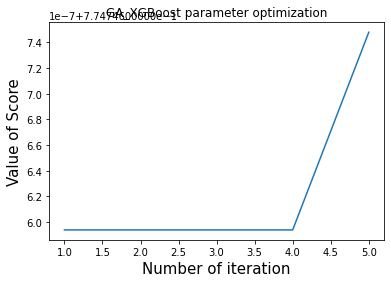

In [10]:
if __name__ == '__main__':
    print('----------------1.Load Data-------------------')
    #x_train = x_train
    #y_train = y_train
    #x_test = x_test
    #y_test = y_test
    print('----------------2.Parameter Setting------------')
    input_par_dic = par_dic
    model_par_funcs = model_pars
    eva_metric = sklearn.metrics.r2_score
    eva_type = 'Max'
    
    population_size = 20
    generations = 5
    
    pc = 0.6 #0.6
    pm = 0.05 #0.01
    print('----------------3.GA Hyperparameter Tuning-----------------')
    ga = GA_hyperparameter_tuning(input_par_dic, model, model_par_funcs, eva_metric, eva_type, population_size, generations, pc, pm)
    ga_results, total_runtime = ga.main() 
    
    